In [1]:
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
aggr_labor = {
    "Сельское, лесное и рыбное хозяйство": [
        (1, "Продукция сельского хозяйства, охоты и сопутствующие услуги"),
        (2, "Продукция лесного хозяйства, лесозаготовок и услуг в этих областях"),
        (3, "Рыба и продукция рыболовства прочая; аквакультура; услуги вспомогательные в области рыболовства"),
    ],
    
    #"Промышленность": [ ],  # ??
    
    "Горнодобывающая промышленность и разработка карьеров": [
        (4, "Уголь каменный и лигнит"),
        (5, "Нефть сырая"),
        (6, "Газ природный в жидком или газообразном состоянии"), 
        (7, "Руды железные"),
        (8, "Руды металлов цветных"),
        (9, "Продукция горнодобывающей промышленности"),
        (10, "Услуги вспомогательные в области горнодобывающей промышленности"),
    ],
    
    "Обрабатывающая промышленность": [
        (11, "Продукты пищевые и напитки"),
        (12, "Изделия табачные"),
        (13, "Текстиль"),
        (14, "Предметы одежды"),
        (15, "Кожа и изделия, относящиеся к ней"),
        (16, "Древесина и изделия из древесины и пробки (кроме мебели), изделия из соломки и материалов для плетения"),
        (17, "Бумага и изделия бумажные"),
        (18, "Услуги по печатанию и воспроизведению"),
        (19, "Продукция печей коксовых"),
        (20, "Продукты переработки нефти"),
        (21, "Вещества химические и продукты химические"),
        (22, "Продукты фармацевтические и препараты фармацевтические основные"),
        (23, "Изделия резиновые и пластмассовые"),
        (24, "Изделия минеральные неметаллические прочие"),
        (25, "Металлы черные основные: железо, чугун, сталь и ферросплавы"),
        (26, "Трубы разных диаметров, профили полые и фитинги для труб разных диаметров из стали"),
        (27, "Изделия стальные прочие, полученные путем первичной обработки"),
        (28, "Металлы драгоценные основные и металлы цветные прочие"),
        (29, "Услуги производства литейного"),
        (30, "Изделия металлические готовые, кроме машин и оборудования"),
        (31, "Компьютеры, продукция электронная и оптическая"),
        (32, "Оборудование электрическое"),
        (33, "Машины и оборудование, не включенные в другие группировки"),
        (34, "Автомобили, прицепы и полуприцепы"),
        (35, "Оборудование транспортное прочее"),
        (36, "Мебель"),
        (37, "Изделия готовые прочие"),
        (38, "Услуги по ремонту и установке машин и оборудования"),
    ],
    
    "Электроснабжение, подача газа, пара и воздушное кондиционирование": [
        (39, "Услуги по производству и распределению электроэнергии"),
        (40, "Газ отопительный; услуги по распределению топлива газообразного трубопроводного"),
        (41, "Услуги по снабжению паром и воздухом охлажденным"),
    ],
    
    "Водоснабжение; водоотведение; сбор, обработка и удаление отходов, деятельность по ликвидации загрязнений": [
        (42, "Водоснабжение; канализационная система, услуги по сбору и удалению отходов"),
    ],
    
    "Строительство": [
        (43, "Здания и работы строительные"),
    ],
    
    "Оптовая и розничная торговля; ремонт автомобилей и мотоциклов": [
        (44, "Услуги по торговле оптовой и розничной; услуги по ремонту автомобилей и мотоциклов"),
        (45, "Услуги по торговле оптовой, кроме торговли автомобилями и мотоциклами"),
        (46, "Услуги по торговле розничной, за исключением автомобилями и мотоциклами"),
    ],
    
    "Транспорт и складирование": [
        (47, "Услуги сухопутного транспорта и транспортирование по трубопроводам"),
        (48, "Услуги водного транспорта"),
        (49, "Услуги воздушного транспорта"),
        (50, "Услуги по хранению и услуги транспортные вспомогательные"),
        (51, "Услуги почтовые и курьерские"),
    ],
    
    "Услуги по проживанию и питанию": [
        (52, "Услуги по организации проживания"),
        (53, "Услуги по предоставлению продуктов питания и напитков"),
    ],
    
    "Информация и связь": [
        (54, "Услуги по информации"),
        (55, "Услуги связи"),
    ],
    
    "Финансовая и страховая деятельность": [
        (56, "Услуги финансовые, кроме услуг по страхованию и обеспечению пенсионному"),
        (57, "Услуги по страхованию, перестрахованию и пенсионному обеспечению, кроме услуг по обязательному социальному обеспечению"),
        (58, "Услуги вспомогательные по отношению к финансовому посредничеству и страхованию"),
    ],
    
    "Операции с недвижимым имуществом": [
        (59, "Услуги, связанные с имуществом недвижимым"),
    ],
    
    "Профессиональная, научная и техническая деятельность": [
        (60, "Услуги профессиональные, научные и технические"),
    ],
    
    "Деятельность в области административного и вспомогательного обслуживания": [
        (61, "Услуги в области административного и вспомогательного обслуживания"),
    ],
    
    "Государственное управление и оборона; обязательное социальное обеспечение": [
        (62, "Услуги в области государственного управления и обороны; услуги по обязательному социальному обеспечению"),
    ],
    
    "Образование": [
        (63, "Услуги в области образования"),
    ],
    
    "Здравоохранение и социальное обслуживание населения": [
        (64, "Услуги в области здравоохранения"),
        (65, "Услуги социальные"),
    ],
    
    "Искусство, развлечения и отдых": [
        (66, "Услуги в области искусства, развлечений и отдыха"),
    ],
    
    "Предоставление прочих видов услуг": [
        (67, "Услуги прочие"),
        (68, "Услуги домашних хозяйств, нанимающих домашнюю прислугу и услуги по производству товаров и услуг для собственного потребления"),
    ],
    
}

$m=20$ - исходя из деления по ОКЭД \
$n=3$ - зарплата, импорт(курс доллара), дефлятор ВВП?


$$
\begin{aligned}
& \left(\sum_{i=1}^m (w_i^j (\tilde{p_i} + v_i) )^{\frac{\rho_j}{1+\rho_j}}+\sum_{k=1}^n (w_{m+k}^j \hat{s_k^j})^{\frac{\rho_j}{1+\rho_j}}\right)^{\frac{1+\rho_j}{\rho_j}} = \tilde{p_j}, \\
& w_i^j=\left(a_{i j}\right)^{\frac{1+\rho_j}{\rho_j}}, \quad w_{m+k}^j=\left(b_{k j}\right)^{\frac{1+\rho_j}{\rho_j}} \\
& i, j=1, . ., m, k=1, . ., n,
\end{aligned}
$$


где $\frac{1}{1+\rho_j}$ - эластичность замещения производственных факторов, а параметр $\rho_j \in(-1,0) \cup(0,+\infty)$. \
А с учётом того, что у меня $\rho$ будет одно на всех, то тут будет просто решаться линейная система $\hat{A}p = \hat{b}$


### Задача без ограничений. 


Если мы считаем, что ни в одной из отраслей мы не можем выйти на максимум, то уравнение для экономического равновесия можно переписать в виде
$$
\begin{aligned}
& \left(\sum_{i=1}^m (w_i^j \tilde{p_i})^{\frac{\rho}{1+\rho}}+\sum_{k=1}^n (w_{m+k}^j \hat{s}_k^j)^{\frac{\rho}{1+\rho}}\right)^{\frac{1+\rho}{\rho}} = \tilde{p_j}, \\
& w_i^j=\left(a_{i j}\right)^{\frac{1+\rho}{\rho}}, \quad w_{m+k}^j=\left(b_{k j}\right)^{\frac{1+\rho}{\rho}} \\
& i, j=1, . ., m, k=1, . ., n,
\end{aligned}
$$

$$
\begin{aligned}
& \sum_{i=1}^m (w_i^j \tilde{p_i})^{\frac{\rho}{1+\rho}}+\sum_{k=1}^n (w_{m+k}^j \hat{s}_k^j)^{\frac{\rho}{1+\rho}} = \tilde{p_j}^{\frac{\rho}{1+\rho}}, \\
& \sum_{i=1, i \ne j}^m a_i^j \tilde{p_i}^{\frac{\rho}{1+\rho}} + (a_j^j - 1) \tilde{p_j}^{\frac{\rho}{1+\rho}} = -\sum_{k=1}^n b_{m+k}^j (\hat{s}_k^j)^{\frac{\rho}{1+\rho}}, \\
\end{aligned}
$$



$$
    p_j = (\hat{p}_j)^\frac{1+\rho}{\rho}
$$



Переобозначим  $\hat{p}_j = (\tilde{p}_j)^{\frac{\rho}{1+\rho}}$. \
В итоге это получается
$$
\begin{aligned}
&    \hat{p}_j = (I - A^T)^{-1} V, \\
&    V = (v_1, \dots, v_m)^T,~ v_j = \sum_{k=1}^n b_k^j (s^j_k)^{\frac{\rho}{1+\rho}}
\end{aligned}
$$

Из предыдущей статьи используем
$$
    \lambda_{ij} = \left(\frac{p_i}{p_j}\right)^{\frac{\rho}{1+\rho}} a_{ij}
$$

### При наличии ограничений 


Если $M_j < +\infty$ ($v_j > 0$), тогда появляется новое уравнение, чтобы для каждой отрасли их было 2:
$$
    Y_j = M_j \cdot (\tilde{p}_j + v_j)
$$
И цены находятся их уравнения
$$
\begin{aligned}
& \left(\sum_{i=1}^m a_{ij} (\tilde{p_i} + v_i)^{\frac{\rho_j}{1+\rho_j}}+\sum_{k=1}^n b_{kj} (\hat{s_k^j})^{\frac{\rho_j}{1+\rho_j}}\right)^{\frac{1+\rho_j}{\rho_j}} = \tilde{p_j}, \\
& i, j=1, . ., m, k=1, . ., n.
\end{aligned}
$$
Поиск матрицы $\Lambda$ 
\begin{aligned}
& \Lambda(\tilde{p}, v)=\left\|\lambda_{i j}(\tilde{p}, v)\right\| \\
& \lambda_{i j}(\tilde{p}, v)=\frac{\tilde{p}_j}{\tilde{p}_j+v_j} a_{i j}\left(\frac{\tilde{p}_i+v_i}{\tilde{p}_j}\right)^{\frac{\rho_j}{1+\rho_j}} \geqslant 0, i, j=1, \ldots, m .
\end{aligned}


### Поиск $Y$ одинаковый в обоих случаях
$$
    Y = (I - \Lambda)^{-1} Z^0.
$$

$$
    Z_i^{j} = \lambda_{ij} Y_j,~ i=1,\dots,m,~ j=1,\dots,m.
$$


$$
    Z_{m+k}^j = \left( \frac{s_k^j}{p_j} \right)^{\frac{\rho}{1+\rho}} b_{kj} Y_j, k=1,\dots, n,~ j=1,\dots,m.
$$

$ m=68$, $n=3$ (после агрегирования по ОКЭД $m=19$) \
1 - импорт(курс доллара) \
2 - индекс зп \
3 - дефлятор ВВП 

Вообще говоря, $s \in \mathbb{R}^{n \times m},~ b \in \mathbb{R}^{n}$

$$
    \sigma = \frac{1}{1+\rho} \\
    \begin{cases}
        \rho \to 0, Cobb-Douglas, \\
        \rho \to +\infty, Leontief~ model, \\
        \rho \to -1, perfect~ substitutes
    \end{cases}
$$
Пример $\rho=-0.5,~ \sigma = 2$.



Разумный диапазон значений на rho, при необходимости(когда определим где примерно значение, будем решать более точно). Сохранить данные с ошибками с таблицу, чтобы правый край сохранить

Z_tmp  Z Z_pred

(Z_tmp - Z) / Z \
(Z_pred - Z) / Z


In [3]:
class Solver:
    def __init__(self):
            self.pre = 'data/'
            
            self.start_year = 2017
            self.end_year = 2023
            self.years = [year for year in range(self.start_year, self.end_year+1)]

            self.dict_A = dict()
            self.dict_Y = dict()
            self.dict_b = dict()
            self.dict_Z0 = dict()
            self.dict_Z3q = dict()
            self.dict_Z1q = dict()
            for year in self.years:
                self.dict_A[year] = pd.read_excel(self.pre + "dict_A_aggr.xlsx", sheet_name=f"{year}", index_col=False)
                self.dict_Y[year] = pd.read_excel(self.pre + "dict_Y_aggr.xlsx", sheet_name=f"{year}", index_col=False)
                self.dict_b[year] = pd.read_excel(self.pre + "dict_B_aggr.xlsx", sheet_name=f"{year}", index_col=False)
                self.dict_Z0[year] = pd.read_excel(self.pre + "dict_Z0.xlsx", sheet_name=f"{year}", index_col=0)
                self.dict_Z3q[year] = pd.read_excel(self.pre +'3quadrant_aggr_byLabor.xlsx', sheet_name=f"{year}", index_col=False)
                self.dict_Z1q[year] = pd.read_excel(self.pre +'1quadrant_aggr_byLabor.xlsx', sheet_name=f"{year}", index_col=False)

            self.tmp_ind = 0
            # self.tmp_ind = 6
            #self.tmp_year = self.years[-1]
            #self.tmp_year = self.years[0]
            self.tmp_year = self.years[self.tmp_ind]
            self.m = self.dict_A[self.tmp_year].shape[0]
            self.n = self.dict_b[self.tmp_year].shape[0]

            self.pre3q = 'data/3q_info/'
            self.defl = pd.read_excel(self.pre3q + "series_deflator" + str(self.tmp_year) + ".xlsx", index_col=False)
            self.labor = pd.read_excel(self.pre3q + "series_labor"  + str(self.tmp_year) + ".xlsx", index_col=0)
            self.index_import = pd.read_excel(self.pre3q + "series_import" + str(self.tmp_year) + ".xlsx", index_col=False)

            self.s = dict()
            for year in self.years:
                imp = self.index_import.loc[:, year]
                lb = self.labor.loc[:, year]
                defl = self.defl.loc[:, year]
                imp_arr = np.zeros(lb.shape) + imp.item()
                self.s[year] = pd.DataFrame({ 
                    "labor" : lb,
                    "defl" : defl.values, 
                    "import" : imp_arr, }, index=self.labor.index)
               
            
    def calculate_v(self, b, s, rho):
        """
        Вычисляет вектор V, где v_j = sum_{k=1}^n b_k^j (s^j_k)^(ρ/(1+ρ))
        
        Параметры:
        b : список массивов numpy, где b[j-1] это вектор (b_1^j, b_2^j, ..., b_n^j)
        s : список массивов numpy, где s[j-1] это вектор (s^j_1, s^j_2, ..., s^j_n)
        rho : float, значение ρ
        
        Возвращает:
        np.ndarray, вектор V
        """
        
        power_value = rho / (1 + rho)
        s_matrix = s.values
        
        # Возводим все элементы s в степень power_value
        s_pow = np.power(s_matrix, power_value)
        
        # Для каждого j (строки в b и s_pow) вычисляем сумму произведений
        # Это векторное скалярное произведение для каждой строки
        
        V = np.sum(b.T * s_pow, axis=1) 
        return V

    def calculate_p_hat(self, A, V):
        """
        Вычисление экономического равновесия
        Вычисляет вектор p_hat = (I - A^T)^(-1) * V
        
        Параметры:
        A : np.ndarray, матрица A
        V : np.ndarray, вектор V
        
        Возвращает:
        np.ndarray, вектор p_hat
        """
        # Вычисляем I - A^T
        I = np.eye(self.m)
        I_minus_AT = I - A.T

        # Вычисляем обратную матрицу и умножаем на V
        p_hat = linalg.solve(I_minus_AT, V)
        return p_hat
    

    def identification(self, rho_values):
            res = []
            for rho in rho_values:
                error = self.solve(rho)
                res.append((rho, error))
            return res
    
    def solve(self, rho):
        # error = 0
        error_vec = []
        error_rel_vec = []
        error = 0
        for year in self.years:
            # V = self.calculate_v(self.dict_b[year], self.s[year], rho)
            V = self.calculate_v(self.dict_b[self.tmp_year], self.s[year], rho)
            # p_hat = self.calculate_p_hat(self.dict_A[year], V)
            p_hat = self.calculate_p_hat(self.dict_A[self.tmp_year], V)
            
            Y_find, Z1q_find = self.find_Y_Z1q(p_hat, rho, year)
            
            # tmp = np.abs(Z1q_find - self.dict_Z1q[year].values)

            # # tmp_err = np.divide(tmp, self.dict_Z1q[year].values, out=np.zeros_like(tmp), where=self.dict_Z1q[year].values > 10**5)
            # tmp_err = np.divide(tmp, self.dict_Z1q[year].values, out=np.zeros_like(tmp), where=self.dict_Z1q[year].values != 0)
            
            # error_vec.append(tmp)
            # error_rel_vec.append(tmp_err)
            
            # new_err = np.sum(tmp_err.values ** 2)
            # # new_err = np.sum(np.abs(tmp_err.values))
            # # new_err = np.sum(tmp.values ** 2)
            # # new_err = np.sum(np.abs(tmp.values))
            
            # error += new_err
            
            

            #tmp = self.dict_Y[year] - Y_find
            
            # #error.append(tmp)
            # error.append(np.abs(np.divide(tmp, self.dict_Y[year], out=np.zeros_like(tmp), where= self.dict_Y[year] != 0)))
            #step_err_rel = linalg.norm(tmp) / linalg.norm(self.dict_Y[year]) 
            # #step_err_rel = linalg.norm(np.divide(tmp, self.dict_Y[year], out=np.zeros_like(tmp), where= self.dict_Y[year] != 0))
            #step_err_rel = np.sum(np.abs(np.divide(tmp, self.dict_Y[year], out=np.zeros_like(tmp), where= self.dict_Y[year] != 0)).values)
            #error_rel += step_err_rel
            # #print(f" error_rel = {step_err_rel}")

            Z = self.calculate_Z(self.s[year], p_hat, year, rho, Y_find)
            # # Z = self.calculate_Z(self.s[year], p_hat, year, rho, self.dict_Y[year].values)
            Z3q = self.dict_Z3q[year].values
            numerator = Z[0, :] - Z3q[0, :] # ошибка чисто на труд
            rel_diff = np.divide(numerator, Z3q[0, :], out=np.zeros_like(numerator), where=Z3q[0, :] != 0)
            #tmp_err = linalg.norm(rel_diff)
            #tmp_err = np.sum(np.abs(rel_diff))
            tmp_err = linalg.norm(numerator)
            #tmp_err = np.sum(np.abs(numerator))
            error += tmp_err
            error_vec.append(numerator)
            rel_diff_vec = np.divide(numerator, Z3q[0, :], out=np.zeros_like(numerator), where=Z3q[0, :] != 0)
            error_rel_vec.append(rel_diff_vec)
            
            

            #error += np.sum(linalg.norm(Z - Z3q, axis=1))
            # numerator = Z - Z3q
            # rel_diff = np.divide(numerator, Z3q, out=np.zeros_like(numerator), where=Z3q != 0)
            # print(f"rel_diff = {rel_diff}")
            #error_rel += np.sum(linalg.norm(rel_diff, axis=1))
            # error_rel += np.sum(np.abs(rel_diff))
        #print(f" Average error = {error_rel / len(self.years)}")
        # error /= len(self.years)
        # error_rel = error / (19 * 19)

        #error_rel = error_rel / len(self.years)
        #error = error_rel / 19

        # error_rel = error_rel / len(self.years)
        # error = error_rel / (3 * 19)
        return error_vec, error, error_rel_vec
        

    def test(self, rho):
        error = []
        error_rel = 0

        error2 = []
        error_rel2 = 0

        error3 = []
        
        V = self.calculate_v(self.dict_b[self.tmp_year], self.s[self.tmp_year], rho)
        p_hat = self.calculate_p_hat(self.dict_A[self.tmp_year], V)
        
        Y_find, Z1q_find = self.find_Y_Z1q(p_hat, rho, self.tmp_year)
        

        Z_tmp = self.calculate_Z(self.s[self.tmp_year], p_hat, self.tmp_year, rho, Y_find)
        Z3q_tmp = self.dict_Z3q[self.tmp_year].values
        
        for year in set(self.years).difference({self.tmp_year}): 
            V = self.calculate_v(self.dict_b[self.tmp_year], self.s[year], rho)
            p_hat = self.calculate_p_hat(self.dict_A[self.tmp_year], V)
            
            Y_find, Z1q_find = self.find_Y_Z1q(p_hat, rho, year)
            

            Z = self.calculate_Z(self.s[year], p_hat, year, rho, Y_find)
            Z3q = self.dict_Z3q[year].values
            numerator = Z3q[0, :] - Z_tmp[0, :]
            # print(f" year = {year}, numerator= {numerator}")
            #error.append(numerator)
            #rel_diff = np.divide(numerator, Z_tmp[0, :], out=np.zeros_like(numerator), where=Z_tmp[0, :] != 0)
            rel_diff = np.divide(numerator, Z3q[0, :], where= Z3q[0, :] != 0)
            tmp_err = linalg.norm(rel_diff)
            error.append(rel_diff)
            
            #error.append(rel_diff)
            # print(rel_diff)
            error_rel += linalg.norm(rel_diff)
            # error_rel += np.sum(np.abs(rel_diff))

            numerator2 = Z3q[0, :] - Z3q_tmp[0, :]
            # print(f" year = {year}, numerator= {numerator}")
            #error2.append(numerator2)
            rel_diff = np.divide(numerator2, Z3q[0, :], out=np.zeros_like(numerator), where= Z3q[0, :] != 0)
            # print(rel_diff)
            tmp_err2 = linalg.norm(rel_diff)
            # error2.append(tmp_err2)
            error2.append(rel_diff)
            error_rel2 += tmp_err2
            
            numerator = Z[0, :] - Z3q[0, :] # ошибка чисто на труд
            rel_diff = np.divide(numerator, Z3q[0, :], out=np.zeros_like(numerator), where=Z3q[0, :] != 0)
            tmp_err = linalg.norm(rel_diff)
            # error3.append(numerator)
            error3.append(rel_diff)

        return error, error_rel, error2, error_rel2, error3


    def test2(self, rho):
        error = []
        error_vec = []
        error_vec_rel = []
        
        V = self.calculate_v(self.dict_b[self.tmp_year], self.s[self.tmp_year], rho)
        p_hat = self.calculate_p_hat(self.dict_A[self.tmp_year], V)
        
        Y_find, Z1q_find = self.find_Y_Z1q(p_hat, rho, self.tmp_year)
        

        Z_tmp = self.calculate_Z(self.s[self.tmp_year], p_hat, self.tmp_year, rho, Y_find)
        Z3q_tmp = self.dict_Z3q[self.tmp_year].values
        
        for year in set(self.years).difference({self.tmp_year}): 
            V = self.calculate_v(self.dict_b[self.tmp_year], self.s[year], rho)
            p_hat = self.calculate_p_hat(self.dict_A[self.tmp_year], V)
            
            Y_find, Z1q_find = self.find_Y_Z1q(p_hat, rho, year)
            

            Z = self.calculate_Z(self.s[year], p_hat, year, rho, Y_find)
            Z3q = self.dict_Z3q[year].values
            numerator = Z[0, :] - Z_tmp[0, :]
            
            numerator = Z[0, :] - Z3q[0, :] # ошибка чисто на труд
            denom = np.abs(Z3q[0, :] - Z3q_tmp[0, :])
            rel_diff = np.divide(numerator, denom, out=np.zeros_like(numerator), where=denom != 0)
            tmp_err = linalg.norm(rel_diff)
            
            rel_diff2 = np.divide(numerator, Z3q[0, :], out=np.zeros_like(numerator), where= Z3q[0, :] != 0)

            error.append(max(rel_diff))
            error_vec.append(rel_diff)
            error_vec_rel.append(rel_diff2)
            
        return error, error_vec, error_vec_rel

    def test3(self, rho):
        pay_vec_solv = []
        pay_vec_stat = []

        V = self.calculate_v(self.dict_b[self.tmp_year], self.s[self.tmp_year], rho)
        p_hat = self.calculate_p_hat(self.dict_A[self.tmp_year], V)
        
        Y_find, Z1q_find = self.find_Y_Z1q(p_hat, rho, self.tmp_year)
        
        Z_tmp = self.calculate_Z(self.s[self.tmp_year], p_hat, self.tmp_year, rho, Y_find)
        Z3q_tmp = self.dict_Z3q[self.tmp_year].values
        
        if self.tmp_year == 2017:
            pay_vec_solv.append(np.sum(Z_tmp[0, :]))
            pay_vec_stat.append(np.sum(Z3q_tmp[0, :]))

        for year in set(self.years).difference({self.tmp_year}): 
            print(year)
            V = self.calculate_v(self.dict_b[self.tmp_year], self.s[year], rho)
            p_hat = self.calculate_p_hat(self.dict_A[self.tmp_year], V)
            
            Y_find, Z1q_find = self.find_Y_Z1q(p_hat, rho, year)
            

            Z = self.calculate_Z(self.s[year], p_hat, year, rho, Y_find)
            Z3q = self.dict_Z3q[year].values
            
            new_val1 = np.sum(Z[0, :])
            new_val2 = np.sum(Z3q[0, :])
            new_val3 = np.sum(Z3q_tmp[0, :])
            print(f" diff between calculate and stat = {(new_val2 - new_val1) / new_val2}")
            print(f" diff between stat tmp_year and stat = {(new_val2 - new_val3) / new_val2}")

            pay_vec_solv.append(new_val1)
            pay_vec_stat.append(new_val2)

        return pay_vec_solv, pay_vec_stat 

    def verification(self, rho, year=2018):
        V = self.calculate_v(self.dict_b[self.tmp_year], self.s[year], rho)
        p_hat = self.calculate_p_hat(self.dict_A[self.tmp_year], V)
        
        Y_find, Z1q_find = self.find_Y_Z1q(p_hat, rho, self.tmp_year)
        
        Z_tmp = self.calculate_Z(self.s[year], p_hat, self.tmp_year, rho, Y_find)
        Z3q_tmp = self.dict_Z3q[year].values

        



    def find_Y_Z1q(self, p_hat, rho, year):
        # lambda_ij = self.calculate_lambda_scalar_rho(p_hat, self.dict_A[year], rho)
        lambda_ij = self.calculate_lambda_scalar_rho(p_hat, self.dict_A[self.tmp_year], rho)
        I = np.eye(lambda_ij.shape[0])
        IminusLmbd = I - lambda_ij
        
        # Преобразуем IminusLmbd и Z0 в массивы NumPy с числовым типом
        IminusLmbd_np = np.array(IminusLmbd, dtype=float)
        IminusLmbd_np = np.linalg.inv(IminusLmbd_np)
        Z0_np = np.array(self.dict_Z0[year], dtype=float)
        
        # Просто перемножаем матрицы
        Y = IminusLmbd_np @ Z0_np
        Y_j = Y.reshape(1, Y.shape[0])
        Z1q = lambda_ij * Y_j
        return Y, Z1q

    
    def calculate_lambda_scalar_rho(self, p_hat, a, rho):
        """
        Вычисляет матрицу Lambda по заданным векторам p, матрице a и скалярному rho.

        Аргумент
            p (np.ndarray): Вектор p (m x 1).
            a (np.ndarray): Матрица a (m x m).

        Возвращает:
            np.ndarray: Матрица Lambda (m x m).
        """
        n = len(p_hat)
        
        # Создаем сетку для деления p_i на p_j
        p_i = p_hat.reshape(n, 1)  # Преобразуем в столбец
        p_j = p_hat.reshape(1, n)  # Преобразуем в строку
        
        # Вычисляем отношение p_i/p_j для всех пар i,j
        ratio = p_i / p_j
        
        
        # Умножаем на a_ij и получаем λ_ij
        lambda_ij = ratio * a
        
        return lambda_ij

    def calculate_Z(self, s, p_hat, year, rho, Y):
        """
        Вычисляет Z_{m+k}^j по формуле Z_{m+k}^j = (s_k^j/p_j)^(ρ/(1+ρ)) * b_{kj} * Y_j
        
        Параметры:
        s : список массивов numpy, где s[j-1][k-1] содержит s_k^j
        p_hat : np.ndarray, вектор pi_j (\hat{p}_j) (массив длины m)
        b : np.ndarray или список, где b[k-1][j-1] или b[k-1, j-1] содержит b_{kj}
        Y : np.ndarray, вектор Y_j (массив длины m)
        rho : float, значение ρ
        Возвращает:
        np.ndarray, матрица Z размера n x m, где Z[k-1, j-1] = Z_{m+k}^j
        """
        power = rho / (1 + rho)

        # Создаем расширенные массивы для векторизации
        s_reshaped = s.T  # Теперь размер n x m, s_reshaped[k, j] = s_k^j
        p_broadcast = p_hat.reshape(1, self.m)  # Размер 1 x m для деления
        Y_broadcast = Y.reshape(1, self.m)  # Размер 1 x m для умножения
        
        #print(s_reshaped.values)
        s_rho = np.power(s_reshaped, power)
        #print(s_rho.values)
        ratio_pow = s_rho / p_broadcast

        ratio_pow_np = np.array(ratio_pow, dtype=float)
        # b_matrix_np = np.array(self.dict_b[year], dtype=float)
        b_matrix_np = np.array(self.dict_b[self.tmp_year], dtype=float)
        Y_broadcast_np = np.array(Y_broadcast, dtype=float)

        
        Z = ratio_pow_np * b_matrix_np * Y_broadcast_np
        return Z

#### test
$$
\frac{Z_{j+1}^{i, 2017} - Z_{j+1}^{i, year}} {Z_{j+1}^{i, 2017}}
$$
Поэлементное деление, на выходе вектор относительной ошибки. \
В качестве метрики сумма квадратов элементов данного вектора. \
Сохраняю все значения (на каждый год) и сравниваю статистические изменения и по моей модели рассчёты


```Python
numerator = Z[0, :] - Z_tmp[0, :]
rel_diff = np.divide(numerator, Z_tmp[0, :], where=Z_tmp[0, :] != 0)
tmp_err = linalg.norm(rel_diff)
error.append(tmp_err)

error_rel += linalg.norm(rel_diff)

numerator2 = Z3q[0, :] - Z3q_tmp[0, :]
rel_diff = np.divide(numerator2, Z3q_tmp[0, :], out=np.zeros_like(numerator), where=Z3q_tmp[0, :] != 0)
tmp_err2 = linalg.norm(rel_diff)
error2.append(tmp_err2)
error_rel2 += tmp_err2
            
```

In [4]:
solv = Solver()

In [201]:
#V = solv.calculate_v(solv.dict_b[2017], solv.s[2017], 0.1)
#solv.calculate_p_hat(solv.dict_A[2017], V)
#solv.solve(0.005)
#solv.solve(5)
#solv.solve(-0.44)
#solv.solve(-0.86)
# solv.solve(-0.58)
solv.solve(0.76)

([array([0.00697196, 0.02997541, 0.07334018, 0.01788372, 0.00360854,
         0.43609715, 0.20490837, 0.03384066, 0.00222394, 0.19162923,
         0.02892578, 0.00864488, 0.04307413, 0.02313089, 0.02723718,
         0.07762408, 0.0058051 , 0.00433755, 0.0051626 ]),
  array([-2.78452453e+07, -1.31683073e+08, -7.18158674e+07, -4.32796110e+07,
          7.30636038e+04, -1.59248811e+08, -6.20205384e+07, -1.17376018e+08,
          6.73630101e+06, -9.97122219e+06, -8.00331645e+07,  2.80698969e+07,
         -5.17663992e+07, -9.38533695e+07,  1.68104372e+07,  1.15753047e+07,
          1.14168228e+07,  4.47204610e+06,  6.93221716e+06]),
  array([-4.33855866e+07, -2.78390081e+08,  5.82504162e+07,  6.58754499e+06,
          1.98044257e+06, -2.34844712e+08,  2.25203723e+08, -2.61647283e+08,
          1.64239707e+07, -7.21272561e+06, -1.56598255e+08,  5.74306339e+07,
         -5.38287029e+07, -4.20522117e+07,  1.76059518e+08, -4.42627718e+07,
          7.02745660e+06,  1.00398818e+06, -8.98365208e+

In [6]:
error_vec, error, error_rel_vec = solv.solve(-0.58)
# error, error_vec, error_rel_vec = solv.solve(-0.4)
#error, error_vec, error_rel_vec = solv.solve(-0.5)
# error_vec, error, error_rel_vec = solv.solve(10)
# error_vec, error, error_rel_vec = solv.solve(-0.86) # На относительную норму 1 квадранта (в абсолютной бесконечность)

In [7]:
error

12756333417.83204

In [8]:
error_vec

[array([0.00697196, 0.02997541, 0.07334018, 0.01788372, 0.00360854,
        0.43609715, 0.20490837, 0.03384066, 0.00222394, 0.19162923,
        0.02892578, 0.00864488, 0.04307413, 0.02313089, 0.02723718,
        0.07762408, 0.0058051 , 0.00433755, 0.0051626 ]),
 array([ 3.14438040e+07,  1.88950542e+08,  2.41597579e+06, -4.68556345e+06,
         6.21835185e+06, -1.21765868e+08,  1.88236371e+08, -2.03603056e+07,
         2.45264516e+07,  2.49281879e+07, -7.71854563e+07,  4.65193902e+07,
         3.89684771e+07, -1.69133134e+08,  4.93976220e+07,  6.46994033e+07,
         3.97345214e+07,  1.58796403e+07,  1.30321015e+08]),
 array([ 2.29412302e+06,  7.35593656e+07,  1.65183994e+08,  7.43331192e+07,
         1.47151639e+07, -2.23799914e+08,  6.69719118e+08, -8.69669634e+07,
         6.70110895e+07,  4.93501746e+07, -1.08444738e+08,  1.22174460e+08,
         2.19081800e+07, -2.01203027e+08,  1.99639916e+08, -9.83974973e+07,
         2.50330652e+07,  7.44226130e+06,  1.83222104e+08]),
 array([

In [9]:
error_rel_vec

[array([1.13186090e-11, 1.66784270e-11, 4.23217490e-11, 3.79291498e-11,
        3.24927093e-11, 4.75804961e-10, 5.60573043e-11, 3.08707567e-11,
        1.34257231e-11, 4.98385116e-10, 4.21283637e-11, 2.70903584e-11,
        5.39478193e-11, 5.31721926e-11, 3.95700457e-11, 7.93757547e-11,
        2.76100603e-11, 3.20828219e-11, 9.02096481e-12]),
 array([ 0.04257764,  0.08104286,  0.0012275 , -0.00846442,  0.04634207,
        -0.1006654 ,  0.04281051, -0.01498135,  0.11726014,  0.05788797,
        -0.09446302,  0.15664709,  0.04216516, -0.27603775,  0.06781398,
         0.06476684,  0.23273917,  0.09430804,  0.17336888]),
 array([ 0.00267772,  0.02800973,  0.0739489 ,  0.1422287 ,  0.10317073,
        -0.16547599,  0.14667905, -0.05406975,  0.31448392,  0.09816343,
        -0.1068727 ,  0.40440319,  0.0193912 , -0.31352579,  0.23915401,
        -0.07561291,  0.0927581 ,  0.04027375,  0.20703893]),
 array([-0.0311573 , -0.11107181, -0.00251988,  0.22856138,  0.23875411,
        -0.08875042

In [5]:
# error, error_rel, error2, error_rel2, error3 = solv.test(-0.58)
# error, error_rel, error2, error_rel2, error3 = solv.test(-0.5)
# error, error_rel, error2, error_rel2, error3 = solv.test(-0.44)
# error, error_rel, error2, error_rel2, error3 = solv.test(0.71)
# error, error_rel, error2, error_rel2, error3 = solv.test(1.15)
# error, error_rel, error2, error_rel2, error3 = solv.test(0.53)
error, error_rel, error2, error_rel2, error3 = solv.test(20)

In [12]:
error_rel

10.011951500994723

In [15]:
error[0] # ошибка от прогноза на базовый год

array([ 0.16591945,  0.2291379 ,  0.11954632,  0.1482345 ,  0.1723519 ,
        0.24227969,  0.16866832,  0.19340013,  0.20804446,  0.10711748,
        0.15969529, -0.0745645 ,  0.13606128,  0.29001753,  0.05505025,
        0.02104881, -0.23152779,  0.19706587,  0.23867184])

In [17]:
error2[0] # отклонение статистики от базового года

array([ 0.16591945,  0.2291379 ,  0.11954632,  0.1482345 ,  0.1723519 ,
        0.24227969,  0.16866832,  0.19340013,  0.20804446,  0.10711748,
        0.15969529, -0.0745645 ,  0.13606128,  0.29001753,  0.05505025,
        0.02104881, -0.23152779,  0.19706587,  0.23867184])

In [18]:
error3[0]  # ошибка от прогноза на этот год

array([-0.05993219, -0.0943221 , -0.04757448, -0.09787267, -0.01272179,
       -0.14067901, -0.03023847, -0.10634112,  0.00831453, -0.04574025,
       -0.09927943,  0.07703115, -0.0829429 , -0.11462867,  0.00995118,
       -0.00377917,  0.02231254,  0.00723281, -0.03550384])

In [19]:
error3

[array([-0.05993219, -0.0943221 , -0.04757448, -0.09787267, -0.01272179,
        -0.14067901, -0.03023847, -0.10634112,  0.00831453, -0.04574025,
        -0.09927943,  0.07703115, -0.0829429 , -0.11462867,  0.00995118,
        -0.00377917,  0.02231254,  0.00723281, -0.03550384]),
 array([-0.06628401, -0.14272536,  0.01200169, -0.02346445, -0.01128446,
        -0.17667592,  0.02217834, -0.19215298,  0.01403961, -0.04544585,
        -0.16811322,  0.13393804, -0.0668619 ,  0.02001514,  0.20204817,
        -0.02255674,  0.00627619, -0.00539616, -0.18180353]),
 array([-1.52927719e-01, -2.06821071e-01, -5.08575364e-02, -4.23074617e-03,
        -9.92416778e-03, -2.18529764e-01,  7.96504431e-06, -1.72418669e-01,
        -3.44913050e-02, -1.30557399e-01, -1.16906171e-01,  4.89237659e-01,
        -1.40829841e-02, -8.26598517e-02,  1.25789222e-01,  1.36214145e-02,
         6.14461984e-02, -6.44236726e-02, -3.36855265e-01]),
 array([-0.19516428, -0.20781092, -0.11358209,  0.02872601, -0.18368416,


In [6]:
error3_np = np.array(error3)
error3_np.shape

(6, 19)

In [7]:
name_sec = list(aggr_labor.keys())

In [10]:
error3_np = error3_np.round(2)

In [11]:
error3_np

array([[-0.06, -0.09, -0.05, -0.1 , -0.01, -0.14, -0.03, -0.11,  0.01,
        -0.05, -0.1 ,  0.08, -0.08, -0.11,  0.01, -0.  ,  0.02,  0.01,
        -0.04],
       [-0.07, -0.14,  0.01, -0.02, -0.01, -0.18,  0.02, -0.19,  0.01,
        -0.05, -0.17,  0.13, -0.07,  0.02,  0.2 , -0.02,  0.01, -0.01,
        -0.18],
       [-0.15, -0.21, -0.05, -0.  , -0.01, -0.22,  0.  , -0.17, -0.03,
        -0.13, -0.12,  0.49, -0.01, -0.08,  0.13,  0.01,  0.06, -0.06,
        -0.34],
       [-0.2 , -0.21, -0.11,  0.03, -0.18, -0.05,  0.01, -0.12,  0.04,
        -0.13,  0.07,  0.33, -0.19, -0.29, -0.04,  0.07,  0.14, -0.12,
        -0.25],
       [-0.14, -0.16, -0.18, -0.14,  0.14, -0.23, -0.04, -0.18, -0.21,
        -0.19, -0.03, -0.22, -0.14, -0.19, -0.12,  0.03, -0.24, -0.19,
        -0.17],
       [-0.  , -0.24,  0.02,  0.1 ,  0.3 , -0.28, -0.07, -0.23, -0.1 ,
        -0.18, -0.03, -0.09, -0.24, -0.28,  0.12, -0.12, -0.53, -0.25,
         0.09]])

In [12]:
df_error3 = pd.DataFrame(error3_np, index=solv.years[1:], columns=name_sec)

In [15]:
df_error3 = df_error3.T

In [16]:
df_error3

,2018,2019,2020,2021,2022,2023
"Сельское, лесное и рыбное хозяйство",-0.06,-0.07,-0.15,-0.20,-0.14,-0.00
Горнодобывающая промышленность и разработка карьеров,-0.09,-0.14,-0.21,-0.21,-0.16,-0.24
Обрабатывающая промышленность,-0.05,0.01,-0.05,-0.11,-0.18,0.02
"Электроснабжение, подача газа, пара и воздушное кондиционирование",-0.10,-0.02,-0.00,0.03,-0.14,0.10
"Водоснабжение; водоотведение; сбор, обработка и удаление отходов, деятельность по ликвидации загрязнений",-0.01,-0.01,-0.01,-0.18,0.14,0.30
Строительство,-0.14,-0.18,-0.22,-0.05,-0.23,-0.28
Оптовая и розничная торговля; ремонт автомобилей и мотоциклов,-0.03,0.02,0.00,0.01,-0.04,-0.07
Транспорт и складирование,-0.11,-0.19,-0.17,-0.12,-0.18,-0.23
Услуги по проживанию и питанию,0.01,0.01,-0.03,0.04,-0.21,-0.10
Информация и связь,-0.05,-0.05,-0.13,-0.13,-0.19,-0.18


In [17]:
with pd.ExcelWriter('error_labor_by_section.xlsx') as writer:
    df_error3.to_excel(writer)

print("Данные успешно записаны в файл")

Данные успешно записаны в файл


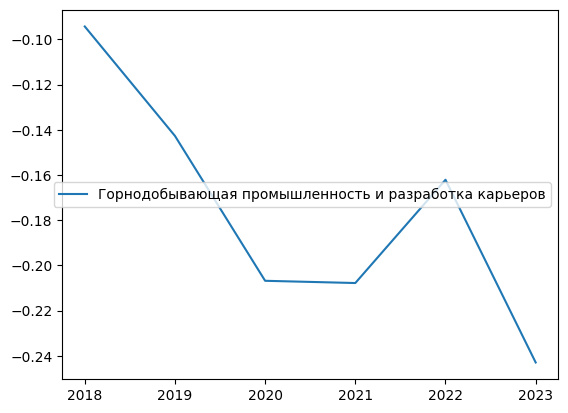

In [66]:
i = 1
plt.plot(solv.years[1:], error3_np[:, i], label=f'{name_sec[i]}')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


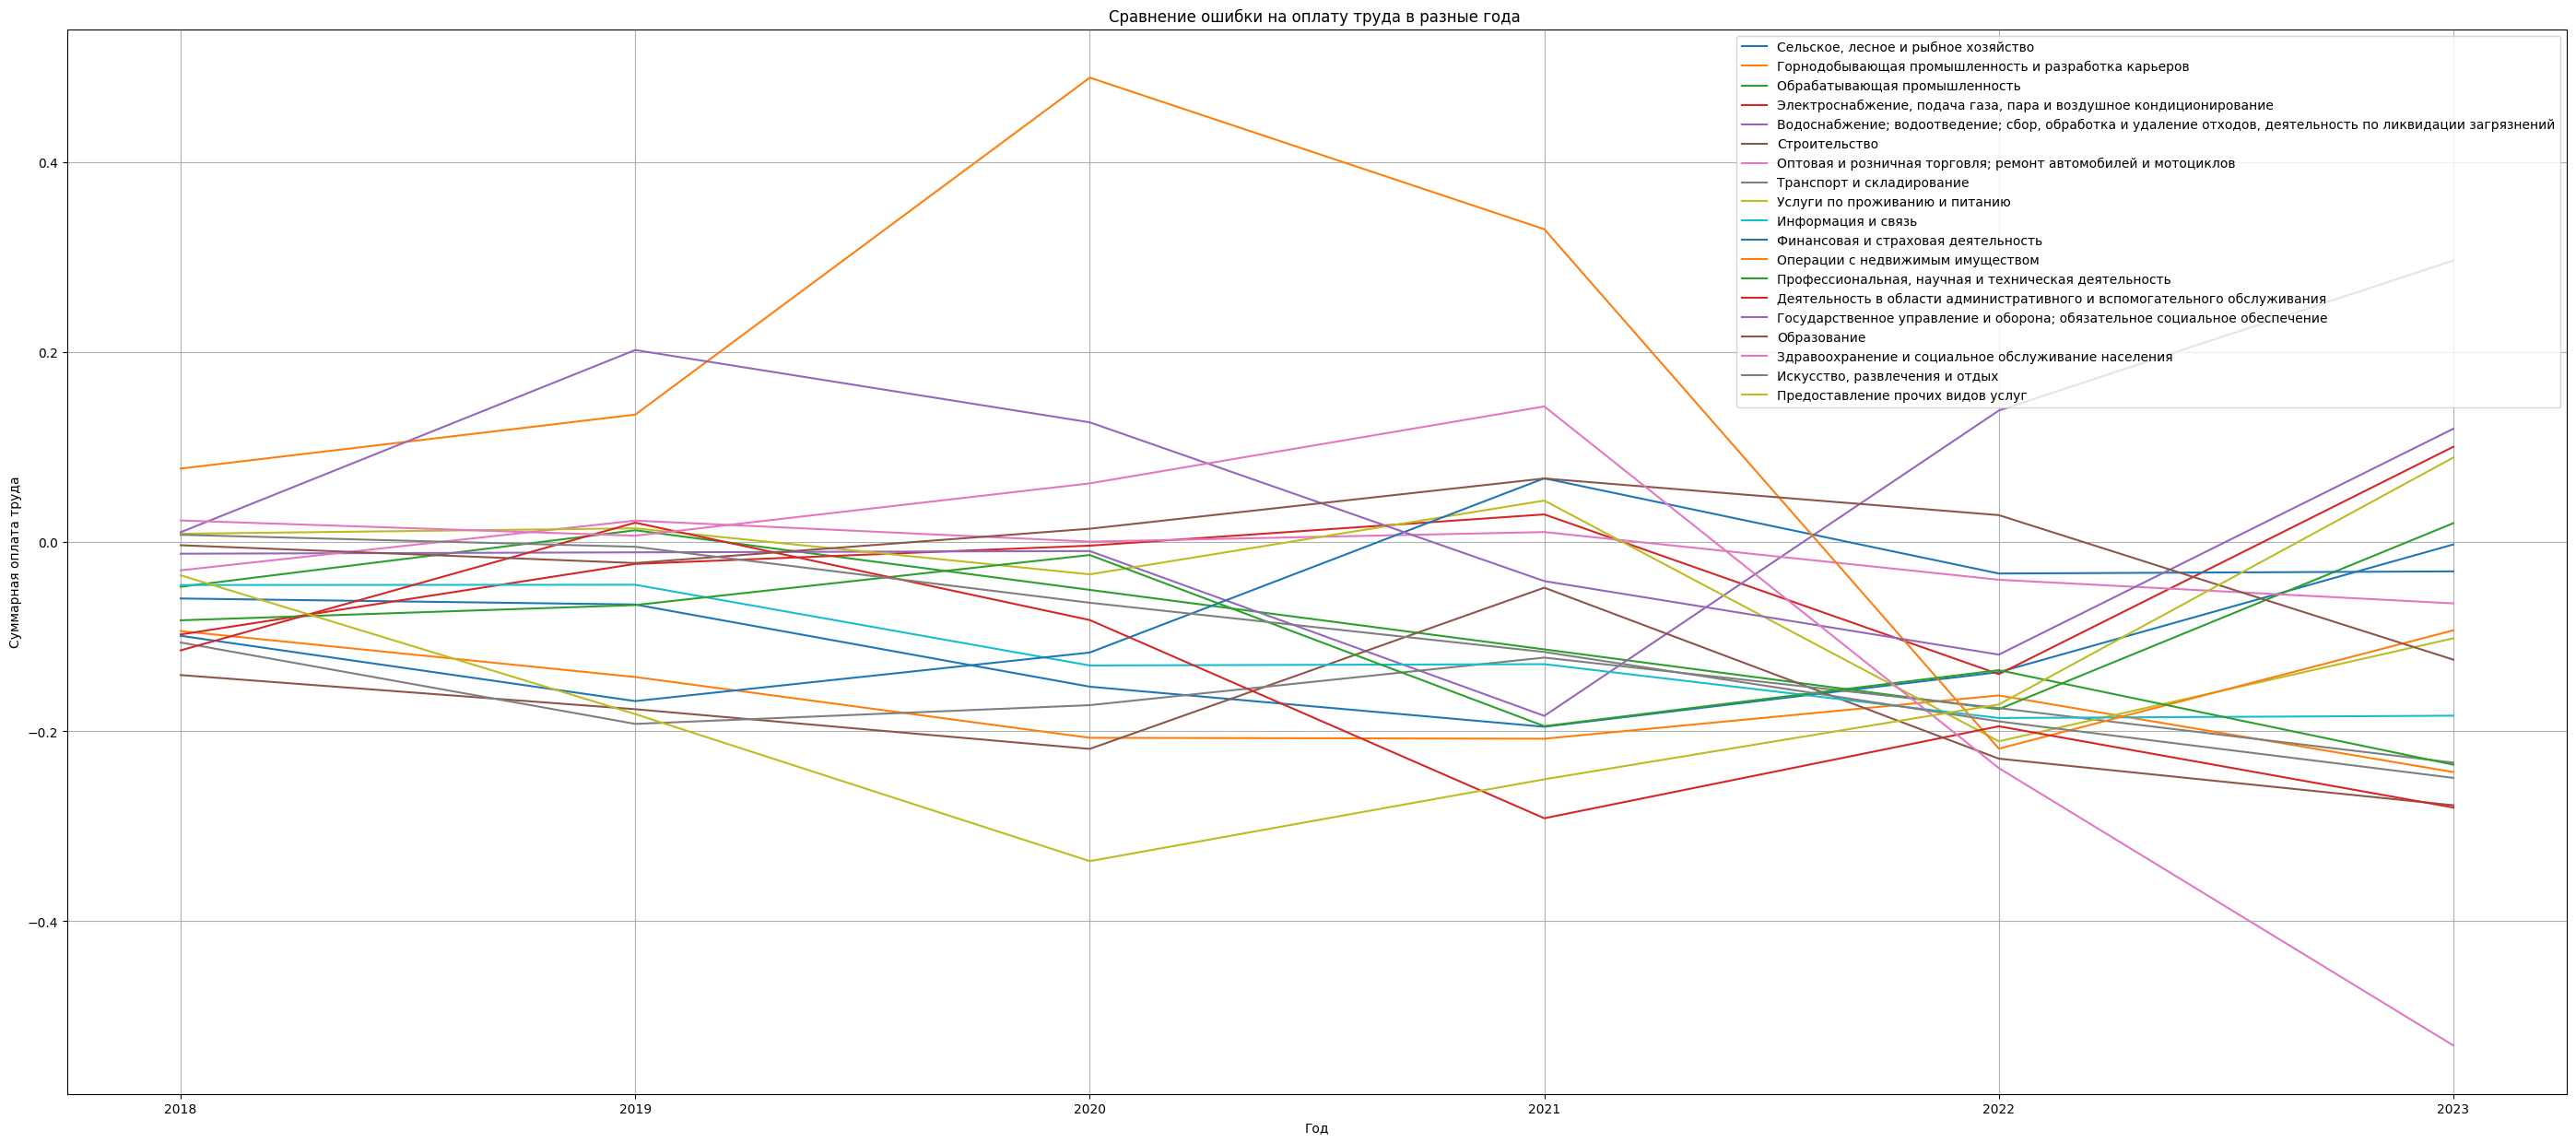

In [65]:
# Визуализация
plt.figure(figsize=(35, 15))
# plt.plot(diff, label='Разница', linestyle='--')
for i in range(19):
    plt.plot(solv.years[1:], error3_np[:, i], label=f'{name_sec[i]}')
plt.xlabel('Год')
plt.ylabel('Суммарная оплата труда')
plt.title(f'Сравнение ошибки на оплату труда в разные года ')
plt.legend()
plt.grid(True)
plt.savefig('graph_error_1_model.eps', format='eps')
plt.show()

In [430]:
np.array(error) / np.array(error3)

array([3.76493848, 1.74869243, 1.33302843, 2.27827715, 5.57475472,
       2.95026891])

In [431]:
np.array(error2) / np.array(error3)

array([3.76493848, 1.74869243, 1.33302843, 2.27827715, 5.57475472,
       2.95026891])

In [8]:
error, error_vec, error_vec_rel = solv.test2(0.76)

In [9]:
error

[1.2676432299625973,
 3.3778288954044617,
 2.001896374848011,
 4.299351096265458,
 0.8518847274899513,
 6.773674109321025]

In [10]:
error_vec

[array([-0.22724806, -0.24649018, -0.30521957, -0.52743553,  0.00315926,
        -0.54339275, -0.08362745, -0.44656971,  0.15480358, -0.21616516,
        -0.6133442 ,  1.26764323, -0.41167424, -0.52815986,  0.41921121,
         0.55049998,  0.28883088,  0.13477301,  0.03863916]),
 array([-0.18019391, -0.3358344 ,  0.11630559,  0.12884499,  0.06272713,
        -0.53873899,  0.24732885, -0.51081282,  0.34624067, -0.06100354,
        -0.47728978,  3.3778289 , -0.162448  , -0.20342149,  1.20220337,
        -0.13686694,  0.11786792,  0.0202444 , -0.28731528]),
 array([-0.2953845 , -0.81185088, -0.11507036,  0.30233175,  0.20070663,
        -0.58935057,  0.25503746, -0.65486955,  0.06940396, -0.27489844,
        -0.19357075,  2.00189637,  0.04231401, -0.25791511,  0.39417465,
        -0.05475917,  0.03064369, -0.06362163, -0.91237666]),
 array([-0.30819099, -0.35649325, -0.19678182,  0.44104364, -0.26197266,
        -0.04550659,  0.28239644, -0.24824585,  0.28508876, -0.21459977,
         0.

In [293]:
error_vec_rel

[array([-0.03770487, -0.05648024, -0.03648788, -0.07818414,  0.0005445 ,
        -0.13165303, -0.0141053 , -0.08636664,  0.03220603, -0.02315507,
        -0.09794818,  0.09452118, -0.05601293, -0.15317562,  0.02307768,
         0.01158737,  0.06687238,  0.02655916,  0.00922208]),
 array([-0.05064005, -0.10600462,  0.02607731,  0.01260458,  0.01388525,
        -0.17364243,  0.04932317, -0.1626733 ,  0.07707791, -0.01434698,
        -0.15432818,  0.19009809, -0.04764444, -0.0655281 ,  0.21090642,
        -0.03401344,  0.0260397 ,  0.00543308, -0.10151427]),
 array([-0.12438986, -0.18562173, -0.03907677,  0.04564283,  0.04202208,
        -0.19027105,  0.05229953, -0.13128581,  0.01275743, -0.09062717,
        -0.06817321,  0.53806423,  0.00842202, -0.08834763,  0.11755788,
        -0.02200052,  0.01998482, -0.02773548, -0.24814905]),
 array([-0.15102983, -0.12525225, -0.08653432,  0.10820484, -0.12843108,
        -0.01522399,  0.07815159, -0.06090278,  0.11746536, -0.08655171,
         0.

In [113]:
rho = 0.53

In [114]:
pay_vec_solv, pay_vec_stat =  solv.test3(rho)

2018
 diff between calculate and stat = 0.03758154643679484
 diff between stat tmp_year and stat = 0.16118671489788136
2019
 diff between calculate and stat = 0.02780357398125149
 diff between stat tmp_year and stat = 0.255727738719677
2020
 diff between calculate and stat = 0.04008049722587218
 diff between stat tmp_year and stat = 0.28412117431746015
2021
 diff between calculate and stat = 0.0206460919849566
 diff between stat tmp_year and stat = 0.39683715815290177
2022
 diff between calculate and stat = 0.04353197343776553
 diff between stat tmp_year and stat = 0.5001855379278815
2023
 diff between calculate and stat = 0.03249422799823941
 diff between stat tmp_year and stat = 0.5710770053102157


$\rho = 0.53$
```
2018
 diff between calculate and stat = 0.03758154643679484
 diff between stat tmp_year and stat = 0.16118671489788136
2019
 diff between calculate and stat = 0.02780357398125149
 diff between stat tmp_year and stat = 0.255727738719677
2020
 diff between calculate and stat = 0.04008049722587218
 diff between stat tmp_year and stat = 0.28412117431746015
2021
 diff between calculate and stat = 0.0206460919849566
 diff between stat tmp_year and stat = 0.39683715815290177
2022
 diff between calculate and stat = 0.04353197343776553
 diff between stat tmp_year and stat = 0.5001855379278815
2023
 diff between calculate and stat = 0.03249422799823941
 diff between stat tmp_year and stat = 0.5710770053102157
 ```

$\rho = 0.76$
```
2018
 diff between calculate and stat = 0.04057372547249346
 diff between stat tmp_year and stat = 0.16118671489788136
2019
 diff between calculate and stat = 0.031247437306699682
 diff between stat tmp_year and stat = 0.255727738719677
2020
 diff between calculate and stat = 0.04448076126810423
 diff between stat tmp_year and stat = 0.28412117431746015
2021
 diff between calculate and stat = 0.028122684599379152
 diff between stat tmp_year and stat = 0.39683715815290177
2022
 diff between calculate and stat = 0.05536953075255799
 diff between stat tmp_year and stat = 0.5001855379278815
2023
 diff between calculate and stat = 0.04640781925169266
 diff between stat tmp_year and stat = 0.5710770053102157
```

In [115]:
pay_vec_solv_np = np.array(pay_vec_solv)
pay_vec_stat_np = np.array(pay_vec_stat)

In [116]:
Z3q_tmp = solv.dict_Z3q[solv.tmp_year]
val = np.sum(Z3q_tmp.values[0, :])
pay_vec_tmp = np.zeros(shape=pay_vec_solv_np.shape) + val

In [117]:
pay_my = np.array([df.values[0, :] for df in  solv.dict_Z3q.values()])
pay_ind_my = np.array([df.values[:, 0] for df in  solv.s.values()])
defl_ind_my = np.array([df.values[:, 1] for df in  solv.s.values()])

In [118]:
pay_vec = np.sum(pay_my * pay_ind_my, axis=1)
pay_defl_vec = np.sum(pay_my * defl_ind_my, axis=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


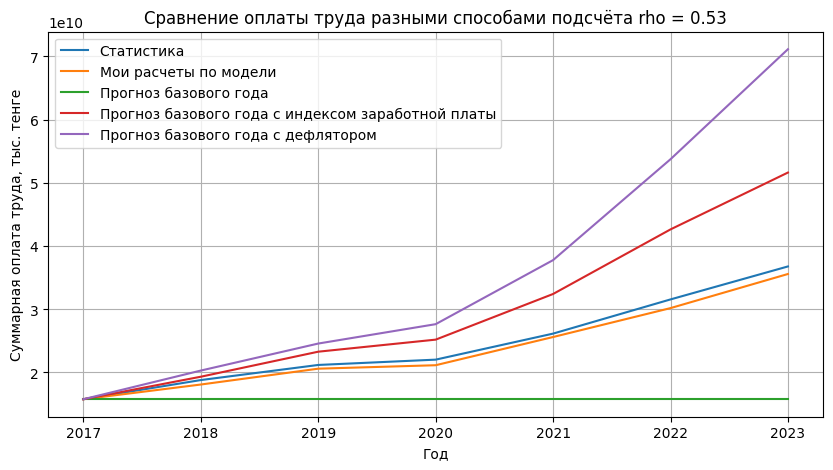

In [119]:
# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(solv.years , pay_vec_stat_np, label='Статистика')
plt.plot(solv.years, pay_vec_solv_np, label='Мои расчеты по модели')
plt.plot(solv.years, pay_vec_tmp, label='Прогноз базового года')
plt.plot(solv.years, pay_vec, label='Прогноз базового года с индексом заработной платы')
plt.plot(solv.years, pay_defl_vec, label='Прогноз базового года с дефлятором')
# plt.plot(diff, label='Разница', linestyle='--')
plt.xlabel('Год')
plt.ylabel('Суммарная оплата труда, тыс. тенге')
plt.title(f'Сравнение оплаты труда разными способами подсчёта rho = {rho}')
plt.legend()
plt.grid(True)
plt.savefig('graph_1_model.eps', format='eps')
plt.show()

In [121]:
rho_values = np.concatenate([
    np.arange(-0.9, -0.0, 0.01),  
    np.arange(0.1, 1.0, 0.01),    
    np.arange(1.0, 10, 0.05)
])
#rho_values = np.concatenate([
#     np.arange(-0.5, -0.0, 0.002),
# ])
# rho_values = np.concatenate([
#    np.arange(-0.04, -0.0, 0.0005),
# ])
# rho_values = np.concatenate([
#     np.arange(5, 20, 0.1),
#     np.arange(20, 30, 0.1),     
#     np.arange(30, 100, 0.2),     
#     np.arange(200, 500, 1)     
# ])


In [122]:
res = solv.identification(rho_values)

In [122]:
res

[(-0.9,
  ([array([0.00697196, 0.02997541, 0.07334018, 0.01788372, 0.00360854,
           0.43609715, 0.20490837, 0.03384066, 0.00222394, 0.19162923,
           0.02892578, 0.00864488, 0.04307413, 0.02313089, 0.02723718,
           0.07762408, 0.0058051 , 0.00433755, 0.0051626 ]),
    array([ 3.17305331e+08,  1.65735350e+09,  2.74067146e+08,  1.64370304e+08,
            3.03162077e+07,  2.62520351e+07,  1.26402289e+09,  4.18083741e+08,
            1.04675777e+08,  1.88192584e+08, -8.18614311e+07,  1.30668007e+08,
            4.84534721e+08, -3.90739118e+08,  1.72099958e+08,  2.79436282e+08,
            1.88815894e+08,  6.44782247e+07,  7.09355836e+08]),
    array([ 1.65471217e+08,  1.70803364e+09,  5.54810959e+08,  3.95240254e+08,
            7.15989713e+07, -2.28811567e+08,  2.73740233e+09,  8.10475682e+08,
            3.30652227e+08,  3.18371170e+08,  7.90719481e+07,  5.13657785e+08,
            3.27823832e+08, -5.28600396e+08,  2.58823415e+08, -3.50920629e+08,
            8.86268134

In [123]:
res_work = [(el[0], el[1][1]) for el in res]

In [124]:
res_work

[(-0.9, 68301612323.359665),
 (-0.89, 61991554512.56033),
 (-0.88, 56563464056.41022),
 (-0.87, 51861951794.01755),
 (-0.86, 47766318034.16063),
 (-0.85, 44179396975.10069),
 (-0.84, 41021671871.576256),
 (-0.83, 38227650590.6096),
 (-0.82, 35743245847.825226),
 (-0.8099999999999999, 33523693578.618515),
 (-0.7999999999999999, 31531844597.709305),
 (-0.7899999999999999, 29736759889.94841),
 (-0.7799999999999999, 28112563718.429),
 (-0.7699999999999999, 26637513975.952835),
 (-0.7599999999999999, 25293252192.678635),
 (-0.7499999999999999, 24064199683.653015),
 (-0.7399999999999999, 22937071218.747185),
 (-0.7299999999999999, 21900482566.52715),
 (-0.7199999999999999, 20944632793.173176),
 (-0.7099999999999999, 20061046068.800735),
 (-0.6999999999999998, 19242360914.506584),
 (-0.6899999999999998, 18482157375.249622),
 (-0.6799999999999998, 17774814621.628338),
 (-0.6699999999999998, 17115393066.687874),
 (-0.6599999999999998, 16499536321.084816),
 (-0.6499999999999998, 15923389275.8909

In [124]:
n = 5
first_n_minimums = sorted(res_work, key=lambda x: x[1])[:n]
first_n_minimums

[(0.7599999999999997, 4771900137.335575),
 (0.7499999999999997, 4771915629.849967),
 (0.7699999999999997, 4771969827.124655),
 (0.7399999999999997, 4772019316.197274),
 (0.7799999999999997, 4772121784.663836)]

Сумма квадратов относительных 1 квадрант

In [ ]:
# 2017
[(-0.85, 613497891.6500114),
 (-0.84, 623382805.9479055),
 (-0.86, 639135873.8618684),
 (-0.83, 652494841.7956793),
 (-0.82, 692134665.3708569)]

In [ ]:
# 2023
[(-0.34999999999999953, 172837916.6279542),
 (-0.3399999999999995, 172840123.49659202),
 (-0.35999999999999954, 172840258.00824472),
 (-0.3299999999999995, 172846473.96282732),
 (-0.36999999999999955, 172847592.31450343)]

Сумма квадратов абс 3 оплата труда

In [ ]:
# 2017
[(0.7599999999999997, 4771900137.335575),
 (0.7499999999999997, 4771915629.849967),
 (0.7699999999999997, 4771969827.124655),
 (0.7399999999999997, 4772019316.197274),
 (0.7799999999999997, 4772121784.663836)]

In [ ]:
# 2023 
[(0.7099999999999996, 5456170065.065053),
 (0.6999999999999996, 5456192542.952427),
 (0.7199999999999996, 5456208769.390207),
 (0.6899999999999997, 5456278299.636445),
 (0.7299999999999996, 5456306625.435254)]

In [50]:
n = 5
first_n_minimums = sorted(res, key=lambda x: x[1])[:n]
first_n_minimums

[(-0.84,
  ([1.3826337145647514,
    1.0705044430770407,
    1.5618970778069916,
    1.6502774956453568,
    3.0402553058449966,
    4.701668409856388,
    10.067045268491501],
   23.474281715287027)),
 (-0.85,
  ([1.3826337145647514,
    1.0715737915434433,
    1.6403378389599585,
    1.7550483954061928,
    3.329482311985623,
    5.188277901901624,
    11.208761421110024],
   25.576115375471616)),
 (-0.83,
  ([1.3826337145647514,
    1.0746318205515066,
    1.499825428721593,
    1.565706725508132,
    2.793126787705126,
    4.280948171735103,
    9.089443431612603],
   21.686316080398814)),
 (-0.86,
  ([1.3826337145647514,
    1.0805440661185235,
    1.7393872100926902,
    1.8842272885560138,
    3.670290355457066,
    5.757662476503205,
    12.543715537863436],
   28.058460649155684)),
 (-0.82,
  ([1.3826337145647514,
    1.082105342065745,
    1.4507948385672684,
    1.4978690967836108,
    2.5809038784262035,
    3.9138922523516677,
    8.249474565428677],
   20.157673688187923)

Функционал только на оплату труда \
Функционал описан ниже, получаем, что $\rho = -0.44$, для второго функционала $\rho = -0.5$
```Python
Z = self.calculate_Z(self.s[year], p_hat, year, rho, Y_find)
Z3q = self.dict_Z3q[year].values
numerator = Z[0, :] - Z3q[0, :] # ошибка чисто на труд
rel_diff = np.divide(numerator, Z3q[0, :], out=np.zeros_like(numerator), where=Z3q[0, :] != 0)
error_rel += linalg.norm(rel_diff)
# error_rel += np.sum(np.abs(rel_diff))
```


Для нормировки и усрелнения в конце пересчитывались коэффициенты
```Python
error_rel = error_rel / len(self.years)
error = error_rel / 19
```


Функционал на 3 квадрант (сумма квадратов относительных отклонений), получаем, что $\rho = -0.54$
```Python
Z = self.calculate_Z(self.s[year], p_hat, year, rho, Y_find)
Z3q = self.dict_Z3q[year].values
numerator = Z - Z3q # ошибка чисто на труд
rel_diff = np.divide(numerator, Z3q, out=np.zeros_like(numerator), where=Z3q != 0)
error_rel += np.sum(linalg.norm(rel_diff, axis=1))
```

Функционал на 3 квадрант (сумма модулей относительных отклонений), получаем, что $\rho = -0.5$
```Python
error_rel += np.sum(np.abs(rel_diff))
```

Для нормировки и усрелнения в конце пересчитывались коэффициенты
```Python
error_rel = error_rel / len(self.years)
error = error_rel / (3 * 19)
```


Функицонал на валовый выпуск
- с квадратами $\rho \to +\infty$

Правильный функционал на сумму из 1 квадранта \
При сравнении абсолютно всех значений, функционал описан ниже, получаем, что $\rho = -0.83$
```Python
tmp = np.abs(Z1q_find - self.dict_Z1q[year].values)
tmp_err = np.divide(tmp, self.dict_Z1q[year].values, out=np.zeros_like(tmp), where=self.dict_Z1q[year].values != 0)
new_err = np.sum(tmp_err.values)
error += new_err
```

При сравнении значений, где элемент в 1 квадранте больше либо равен $10^5$, функционал описан ниже, получаем, что $\rho = -0.35$

```Python
tmp = np.abs(Z1q_find - self.dict_Z1q[year].values)
tmp_err = np.divide(tmp, self.dict_Z1q[year].values, out=np.zeros_like(tmp), where=self.dict_Z1q[year].values > 10**5)
new_err = np.sum(tmp_err.values)
error += new_err
```

При сравнении значений, где элемент в 1 квадранте больше либо равен $10^5$, функционал описан ниже( добавили квадрат), получаем, что $\rho = -0.87$

```Python
tmp = np.abs(Z1q_find - self.dict_Z1q[year].values)
tmp_err = np.divide(tmp, self.dict_Z1q[year].values, out=np.zeros_like(tmp), where=self.dict_Z1q[year].values > 10**5)
new_err = np.sum(tmp_err.values ** 2)
error += new_err
```


При сравнении значений, где элемент в 1 квадранте больше либо равен $10^6$, функционал описан ниже, получаем, что $\rho \to + \infty$
```Python
tmp = np.abs(Z1q_find - self.dict_Z1q[year].values)
tmp_err = np.divide(tmp, self.dict_Z1q[year].values, out=np.zeros_like(tmp), where=self.dict_Z1q[year].values > 10**6)
new_err = np.sum(tmp_err.values)
error += new_err
```

Для нормировки и усрелнения в конце пересчитывались коэффициенты
```Python
error /= (19 * 19)
error_rel = error / len(self.years)
        
```

Эксперименты:
- Оплата труда  \
сумма квадратов(норма) $\rho = -0.44$, \
сумма модулей $\rho = -0.5$
- Весь 3 квадрант \
сумма квадратов(норма) $\rho = -0.54$, \
сумма модулей $\rho = -0.5$
- Валовый выпуск $\rho \to +\infty$
- 1 квадрант \
При сравнении абсолютно всех значений, функционал описан ниже, получаем, что $\rho = -0.83$ \
При сравнении значений, где элемент в 1 квадранте больше либо равен $10^5$, получаем, что $\rho = -0.35$ \
При сравнении значений, где элемент в 1 квадранте больше либо равен $10^5$, добавили квадрат, получаем, что $\rho = -0.87$ \
При сравнении значений, где элемент в 1 квадранте больше либо равен $10^6$, функционал описан ниже, получаем, что $\rho \to + \infty$ \


In [51]:
tmp1 = solv.dict_Z1q[2017].values
res_tmp =np.divide(np.abs(tmp1 - solv.dict_Z1q[2018].values), tmp1, where=tmp1 != 0)
#np.abs((solv.dict_Z1q[2017] - solv.dict_Z1q[2018]) / solv.dict_Z1q[2017])
pd.DataFrame(res_tmp, columns=solv.dict_Z1q[2017].columns)

,"Сельское, лесное и рыбное хозяйство",Горнодобывающая промышленность и разработка карьеров,Обрабатывающая промышленность,"Электроснабжение, подача газа, пара и воздушное кондиционирование","Водоснабжение; водоотведение; сбор, обработка и удаление отходов, деятельность по ликвидации загрязнений",Строительство,Оптовая и розничная торговля; ремонт автомобилей и мотоциклов,Транспорт и складирование,Услуги по проживанию и питанию,Информация и связь,Финансовая и страховая деятельность,Операции с недвижимым имуществом,"Профессиональная, научная и техническая деятельность",Деятельность в области административного и вспомогательного обслуживания,Государственное управление и оборона; обязательное социальное обеспечение,Образование,Здравоохранение и социальное обслуживание населения,"Искусство, развлечения и отдых",Предоставление прочих видов услуг
0,0.240134,0.056311,0.199773,8.923756,94.979094,3.651075,2632.919957,0.181532,0.822973,7.193899,1.155172,3.443955,0.624927,0.187318,0.936016,2.208436,3.760701,0.840859,0.998479
1,1.223093,0.018454,0.233762,1.061282,0.192298,0.070905,0.261987,0.269245,1.503836,0.531944,0.797028,0.074484,1.010148,0.333923,4.496672,41.919845,1.462325,2.168036,110.028983
2,0.251058,0.396752,0.297374,0.219065,0.524267,0.381893,0.080571,0.235048,0.403316,0.109097,0.153667,0.068224,0.344657,0.323062,1.603550,0.185085,0.229631,0.264326,0.702336
3,1.007256,0.450482,0.600490,0.201713,0.597105,1.952883,0.310140,0.213561,0.473229,0.583261,0.201400,0.237322,0.816525,1.112587,0.185538,0.106122,0.109391,0.676261,0.331224
4,0.095637,0.219014,0.433335,0.138790,0.166063,1.054241,0.182551,0.625165,0.096455,0.089002,0.009977,0.463049,0.429289,2.593384,0.273603,0.415760,0.690119,0.604777,0.152557
5,0.785331,3.103387,2.499515,1.013222,2.400277,1.237103,0.340344,0.203472,3.341301,0.963748,0.125830,0.138904,0.511204,1.650467,0.331021,0.076359,0.747450,0.108436,0.114235
6,0.077795,0.019099,0.020894,0.002719,0.277733,0.031798,0.148563,0.011860,0.058431,0.205436,0.022949,0.051609,0.186050,0.002994,2.216941,0.070047,0.064738,0.120285,0.214941
7,0.281462,0.689717,0.137860,0.033351,0.013763,0.341446,0.149220,0.425463,0.259008,0.435665,0.900975,0.246832,0.414165,1.035265,0.400115,0.054165,0.682252,0.502492,2.548322
8,0.782737,0.913989,1.035112,0.095519,0.155678,0.728257,0.560726,0.038594,0.246395,1.546750,0.208290,5.233057,0.580255,0.099165,0.294385,6.989355,0.640821,0.050516,0.012046
9,0.876246,0.915959,1.833231,0.641968,0.463265,5.239483,0.026896,0.112849,10.592030,0.334034,0.315539,11.481621,0.512734,0.103172,0.441912,0.107264,0.141342,1.115905,1.037142


In [52]:
tmp1 = solv.dict_Z3q[2017].values
res_tmp =np.divide(np.abs(tmp1 - solv.dict_Z3q[2018].values), tmp1, where=tmp1 != 0)
#np.abs((solv.dict_Z1q[2017] - solv.dict_Z1q[2018]) / solv.dict_Z1q[2017])
pd.DataFrame(res_tmp, columns=solv.dict_Z3q[2017].columns)

,"Сельское, лесное и рыбное хозяйство",Горнодобывающая промышленность и разработка карьеров,Обрабатывающая промышленность,"Электроснабжение, подача газа, пара и воздушное кондиционирование","Водоснабжение; водоотведение; сбор, обработка и удаление отходов, деятельность по ликвидации загрязнений",Строительство,Оптовая и розничная торговля; ремонт автомобилей и мотоциклов,Транспорт и складирование,Услуги по проживанию и питанию,Информация и связь,Финансовая и страховая деятельность,Операции с недвижимым имуществом,"Профессиональная, научная и техническая деятельность",Деятельность в области административного и вспомогательного обслуживания,Государственное управление и оборона; обязательное социальное обеспечение,Образование,Здравоохранение и социальное обслуживание населения,"Искусство, развлечения и отдых",Предоставление прочих видов услуг
0,0.198925,0.297249,0.135778,0.174032,0.208243,0.319748,0.202889,0.239772,0.262697,0.119968,0.190044,0.069390,0.157490,0.408485,0.058257,0.021501,0.188000,0.245432,0.313494
1,0.152296,0.264746,0.146355,0.145168,0.159014,0.076873,0.112630,0.218202,0.282169,0.150926,0.053126,0.006226,0.254229,0.312129,0.064344,0.061421,0.108455,0.266446,0.350484
2,0.034578,0.032677,0.149975,0.208373,0.293096,0.745610,0.011369,1.096372,0.000000,0.335751,0.334541,1.428632,0.362631,0.032264,0.000000,NaN,NaN,0.062953,0.278734


In [53]:
def price_CES(rho, A, A0, s, B):
    """
        rho - эластичность
        A - 
    """


In [77]:
from scipy.optimize import fsolve

In [78]:
class Solver_v2:
    def __init__(self):
            self.pre = 'data/'
            
            self.start_year = 2017
            self.end_year = 2023
            self.years = [year for year in range(self.start_year, self.end_year+1)]

            self.dict_A = dict()
            self.dict_Y = dict()
            self.dict_b = dict()
            self.dict_Z0 = dict()
            self.dict_Z3q = dict()
            self.dict_Z1q = dict()
            for year in self.years:
                self.dict_A[year] = pd.read_excel(self.pre + "dict_A_aggr.xlsx", sheet_name=f"{year}", index_col=False)
                self.dict_Y[year] = pd.read_excel(self.pre + "dict_Y_aggr.xlsx", sheet_name=f"{year}", index_col=False)
                self.dict_b[year] = pd.read_excel(self.pre + "dict_B_aggr.xlsx", sheet_name=f"{year}", index_col=False)
                self.dict_Z0[year] = pd.read_excel(self.pre + "dict_Z0.xlsx", sheet_name=f"{year}", index_col=0)
                self.dict_Z3q[year] = pd.read_excel(self.pre +'3quadrant_aggr_byLabor.xlsx', sheet_name=f"{year}", index_col=False)
                self.dict_Z1q[year] = pd.read_excel(self.pre +'1quadrant_aggr_byLabor.xlsx', sheet_name=f"{year}", index_col=False)

            self.tmp_ind = 0
            # self.tmp_ind = 6
            #self.tmp_year = self.years[-1]
            #self.tmp_year = self.years[0]
            self.tmp_year = self.years[self.tmp_ind]
            self.m = self.dict_A[self.tmp_year].shape[0]
            self.n = self.dict_b[self.tmp_year].shape[0]

            self.pre3q = 'data/3q_info/'
            self.defl = pd.read_excel(self.pre3q + "series_deflator" + str(self.tmp_year) + ".xlsx", index_col=False)
            self.labor = pd.read_excel(self.pre3q + "series_labor"  + str(self.tmp_year) + ".xlsx", index_col=0)
            self.index_import = pd.read_excel(self.pre3q + "series_import" + str(self.tmp_year) + ".xlsx", index_col=False)

            self.s = dict()
            for year in self.years:
                imp = self.index_import.loc[:, year]
                lb = self.labor.loc[:, year]
                defl = self.defl.loc[:, year]
                imp_arr = np.zeros(lb.shape) + imp.item()
                self.s[year] = pd.DataFrame({ 
                    "labor" : lb,
                    "defl" : defl.values, 
                    "import" : imp_arr, }, index=self.labor.index)
               
            

    def calculate_p_v(self, year, M, rho):
        """
        Расчет равновесных цен и наценок с разделением на секторы с ограничениями и без
        
        Параметры:
        year - год для получения данных
        M - вектор ограничений мощностей
        rho - общее значение параметра эластичности
        
        Возвращает:
        p - вектор равновесных цен
        p_v - вектор цен с наценками (p_hat)
        """
        # Получаем необходимые данные
        a = self.dict_A[self.tmp_year].values
        b = self.dict_b[self.tmp_year].values
        s = self.s[year].values
        m = self.m
        Y = self.dict_Y[year].values.reshape(1, m)
        #Y = self.dict_Y[year]
        M = M.reshape(1, m)
        
        
        # Вычисляем степени первичных ресурсов
        s_pow = np.power(s, rho / (1 + rho))
        resource_term = np.sum(b.T * s_pow, axis=1)
        
        # Определяем отрасли с ограничениями мощности
        #constrained = ~np.isinf(M)[0]
        constrained = ~np.isinf(M)
        print("constrained", constrained, constrained.shape)
        unconstrained = ~constrained
        print(unconstrained)
        
        # Инициализируем векторы цен и наценок
        p = np.zeros([1, m])
        p_v = np.zeros([1, m])
        
        if np.any(constrained):
            # Для отраслей с ограничениями мощности используем формулу (32)
            p_v[constrained] = Y[constrained] / M[constrained]
            
            # Теперь нам нужно решить систему уравнений для секторов без ограничений
            if np.any(unconstrained):
                # Количество секторов без ограничений
                n_free = np.sum(unconstrained)
                
                # Индексы секторов без ограничений
                free_idx = np.where(unconstrained)[1]
                print(free_idx)

                # Функция для решения системы уравнений
                def equations(p_free):
                    # Временный вектор для всех цен
                    p_temp = np.zeros([1, m])
                    p_temp[constrained] = p[constrained]  # Заполним позже
                    p_temp[unconstrained] = p_free
                    
                    # Для секторов без ограничений p_v = p
                    p_v_temp = p_v.copy()
                    p_v_temp[unconstrained] = p_free
                    
                    # Вычисляем степени цен
                    p_v_temp = np.maximum(p_v_temp, 1e-10) 
                    p_v_pow = np.power(p_v_temp, rho / (1 + rho))
                    
                    # Вычисляем правую часть уравнения (22) для неограниченных секторов
                    pi_price = np.zeros(n_free)
                    for i, j in enumerate(free_idx):
                        # Сумма по всем секторам
                        sum_term = np.sum(a[:, j] * p_v_pow)
                        pi_price[i] = sum_term + resource_term[j]
                    
                    #print(pi_price)
                    # Преобразуем к p и вычисляем невязку
                    pi_price = np.maximum(pi_price, 1e-10) 
                    p_calc = np.power(pi_price, (1 + rho) / rho)
                    return p_calc - p_free
                
                # Начальное приближение для цен секторов без ограничений
                initial_guess = np.ones(n_free)
                
                p_free_solution = fsolve(equations, initial_guess)
                
                # Заполняем решением
                p[unconstrained] = p_free_solution
                p_v[unconstrained] = p_free_solution
                
            # Теперь мы можем вычислить цены для секторов с ограничениями
            # Вычисляем степени цен
            p_v_pow = np.power(p_v, rho / (1 + rho))
            
            # Вычисляем правую часть уравнения (22) для секторов с ограничениями
            print(np.where(constrained)[1])
            for j in np.where(constrained)[1]:
                sum_term = np.sum(a[:, j] * p_v_pow)
                pi_price_j = sum_term + resource_term[j]
                p[0, j] = np.power(pi_price_j, (1 + rho) / rho)
        else:
            # Если нет ограничений, можем использовать линейный подход
            # Преобразуем коэффициенты для линейной системы
            A_matrix = np.zeros((m, m))
            for i in range(m):
                for j in range(m):
                    A_matrix[i, j] = a[i, j] * (rho / (1 + rho))
            
            # Решаем линейную систему (I - A) * p = resource_term
            p = np.linalg.solve(np.eye(m) - A_matrix, resource_term)
            p_v = p.copy()
        
        print("p", p)
        print("p_v", p_v)
        print(p_v - p)
        return p, p_v

    def identification(self, rho_values, M):
            res = []
            for rho in rho_values:
                error = self.solve(rho, M)
                res.append((rho, error))
            return res
    
    def solve(self, rho, M):
        # error = 0
        error_vec = []
        error_rel_vec = []
        error = 0
        for year in self.years:
            
            p, p_v = self.calculate_p_v(year, M, rho)
            
            Y_find, Z1q_find = self.find_Y_Z1q(p, p_v, rho, year)
            
            # tmp = np.abs(Z1q_find - self.dict_Z1q[year].values)

            # # tmp_err = np.divide(tmp, self.dict_Z1q[year].values, out=np.zeros_like(tmp), where=self.dict_Z1q[year].values > 10**5)
            # tmp_err = np.divide(tmp, self.dict_Z1q[year].values, out=np.zeros_like(tmp), where=self.dict_Z1q[year].values != 0)
            
            # error_vec.append(tmp)
            # error_rel_vec.append(tmp_err)
            
            # new_err = np.sum(tmp_err.values ** 2)
            # # new_err = np.sum(np.abs(tmp_err.values))
            # # new_err = np.sum(tmp.values ** 2)
            # # new_err = np.sum(np.abs(tmp.values))
            
            # error += new_err
            
            

            #tmp = self.dict_Y[year] - Y_find
            
            # #error.append(tmp)
            # error.append(np.abs(np.divide(tmp, self.dict_Y[year], out=np.zeros_like(tmp), where= self.dict_Y[year] != 0)))
            #step_err_rel = linalg.norm(tmp) / linalg.norm(self.dict_Y[year]) 
            # #step_err_rel = linalg.norm(np.divide(tmp, self.dict_Y[year], out=np.zeros_like(tmp), where= self.dict_Y[year] != 0))
            #step_err_rel = np.sum(np.abs(np.divide(tmp, self.dict_Y[year], out=np.zeros_like(tmp), where= self.dict_Y[year] != 0)).values)
            #error_rel += step_err_rel
            # #print(f" error_rel = {step_err_rel}")

            Z = self.calculate_Z(self.s[year], p, p_v, rho, Y_find)
            # # Z = self.calculate_Z(self.s[year], p_hat, year, rho, self.dict_Y[year].values)
            Z3q = self.dict_Z3q[year].values
            numerator = Z[0, :] - Z3q[0, :] # ошибка чисто на труд
            rel_diff = np.divide(numerator, Z3q[0, :], out=np.zeros_like(numerator), where=Z3q[0, :] != 0)
            #tmp_err = linalg.norm(rel_diff)
            #tmp_err = np.sum(np.abs(rel_diff))
            tmp_err = linalg.norm(numerator)
            #tmp_err = np.sum(np.abs(numerator))
            error += tmp_err
            error_vec.append(numerator)
            rel_diff_vec = np.divide(numerator, Z3q[0, :], out=np.zeros_like(numerator), where=Z3q[0, :] != 0)
            error_rel_vec.append(rel_diff_vec)

        #print(f" Average error = {error_rel / len(self.years)}")
        # error /= len(self.years)
        # error_rel = error / (19 * 19)

        #error_rel = error_rel / len(self.years)
        #error = error_rel / 19

        # error_rel = error_rel / len(self.years)
        # error = error_rel / (3 * 19)
        return error_vec, error, error_rel_vec
        

    def test3(self, rho, M):
        pay_vec_solv = []
        pay_vec_stat = []

        p, p_v = self.calculate_p_v(self.tmp_year, M, rho)
        
        Y_find, Z1q_find = self.find_Y_Z1q(p, p_v, rho, self.tmp_year)
        
        Z_tmp = self.calculate_Z(self.s[self.tmp_year], p, p_v, rho, Y_find)
        Z3q_tmp = self.dict_Z3q[self.tmp_year].values
        
        if self.tmp_year == 2017:
            pay_vec_solv.append(np.sum(Z_tmp[0, :]))
            pay_vec_stat.append(np.sum(Z3q_tmp[0, :]))

        for year in set(self.years).difference({self.tmp_year}): 
            print(year)

            p, p_v = self.calculate_p_v(year, M, rho)
            print("v", p_v - p)

            Y_find, Z1q_find = self.find_Y_Z1q(p, p_v, rho, year)

            Z = self.calculate_Z(self.s[year], p, p_v, rho, Y_find)
            Z3q = self.dict_Z3q[year].values
            
            new_val1 = np.sum(Z[0, :])
            new_val2 = np.sum(Z3q[0, :])
            new_val3 = np.sum(Z3q_tmp[0, :])
            print(f" diff between calculate and stat = {(new_val2 - new_val1) / new_val2}")
            print(f" diff between stat tmp_year and stat = {(new_val2 - new_val3) / new_val2}")

            pay_vec_solv.append(new_val1)
            pay_vec_stat.append(new_val2)

        return pay_vec_solv, pay_vec_stat 

    def verification(self, rho, year=2018):
        V = self.calculate_v(self.dict_b[self.tmp_year], self.s[year], rho)
        p_hat = self.calculate_p_hat(self.dict_A[self.tmp_year], V)
        
        Y_find, Z1q_find = self.find_Y_Z1q(p_hat, rho, self.tmp_year)
        
        Z_tmp = self.calculate_Z(self.s[year], p_hat, self.tmp_year, rho, Y_find)
        Z3q_tmp = self.dict_Z3q[year].values

        



    def find_Y_Z1q(self, p, p_v, rho, year):
        # lambda_ij = self.calculate_lambda_scalar_rho(p_hat, self.dict_A[year], rho)
        lambda_ij = self.calculate_lambda_scalar_rho(p, p_v, self.dict_A[self.tmp_year], rho)
        I = np.eye(lambda_ij.shape[0])
        IminusLmbd = I - lambda_ij
        
        # Преобразуем IminusLmbd и Z0 в массивы NumPy с числовым типом
        IminusLmbd_np = np.array(IminusLmbd, dtype=float)
        IminusLmbd_np = np.linalg.inv(IminusLmbd_np)
        Z0_np = np.array(self.dict_Z0[year], dtype=float)
        
        # Просто перемножаем матрицы
        Y = IminusLmbd_np @ Z0_np
        Y_j = Y.reshape(1, Y.shape[0])
        Z1q = lambda_ij * Y_j
        return Y, Z1q

    
    def calculate_lambda_scalar_rho(self, p, p_v, a, rho):
        """
        Вычисляет матрицу Lambda по заданным векторам p, матрице a и скалярному rho.

        Аргумент
            p (np.ndarray): Вектор p (m x 1).
            a (np.ndarray): Матрица a (m x m).

        Возвращает:
            np.ndarray: Матрица Lambda (m x m).
        """
        m = self.m
        # Создаем сетку для деления p_i на p_j
        num = np.power(p_v.reshape(m, 1), rho / (1 + rho))  # Преобразуем в столбец
        denom_prev = np.power(p, 1 / (1 + rho)) / p_v
        denom = denom_prev.reshape(1, m)  # Преобразуем в строку
        
        # Вычисляем отношение p_i/p_j для всех пар i,j
        ratio = num / denom
        
        
        # Умножаем на a_ij и получаем λ_ij
        lambda_ij = ratio * a
        
        return lambda_ij

    def calculate_Z(self, s, p, p_v, rho, Y):
        """
        Вычисляет Z_{m+k}^j по формуле Z_{m+k}^j = (s_k^j/p_j)^(ρ/(1+ρ)) * b_{kj} * Y_j
        
        Параметры:
        s : список массивов numpy, где s[j-1][k-1] содержит s_k^j
        p_hat : np.ndarray, вектор pi_j (\hat{p}_j) (массив длины m)
        b : np.ndarray или список, где b[k-1][j-1] или b[k-1, j-1] содержит b_{kj}
        Y : np.ndarray, вектор Y_j (массив длины m)
        rho : float, значение ρ
        Возвращает:
        np.ndarray, матрица Z размера n x m, где Z[k-1, j-1] = Z_{m+k}^j
        """
        power = rho / (1 + rho)

        # Создаем расширенные массивы для векторизации
        s_reshaped = s.T  # Теперь размер n x m, s_reshaped[k, j] = s_k^j
        p_v_broadcast = p_v.reshape(1, self.m)  # Размер 1 x m для деления
        p_broadcast = p.reshape(1, self.m)  # Размер 1 x m для деления
        Y_broadcast = Y.reshape(1, self.m)  # Размер 1 x m для умножения
        
        #print(s_reshaped.values)
        ratio_pow = np.power(s_reshaped / p_broadcast, power)
        #print(s_rho.values)
        
        ratio_pow_np = np.array(ratio_pow, dtype=float)
        # b_matrix_np = np.array(self.dict_b[year], dtype=float)
        b_matrix_np = np.array(self.dict_b[self.tmp_year], dtype=float)
        Y_broadcast_np = np.array(Y_broadcast, dtype=float)

        
        Z = ratio_pow_np * b_matrix_np * Y_broadcast_np * (p / p_v)
        tmp = ((p_v_broadcast - p_broadcast) / p_v_broadcast) * Y_broadcast_np
        Z[1, :] += tmp.reshape(self.m)
        return Z

In [79]:
solv_V2 = Solver_v2()

In [80]:
M = np.zeros([solv_V2.m, 1]) + np.inf
# M[0] = 10 ** 7
# M[0] = 4 * 10 ** 9
M[1] = 1.5 * 10 ** 10

In [81]:
p, p_v = solv_V2.calculate_p_v(2020, M, rho)

constrained [[False  True False False False False False False False False False False
  False False False False False False False]] (1, 19)
[[ True False  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True]]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[1]
p [[1.28543092 1.13454022 1.19939447 1.14911567 1.14145242 1.14620505
  1.16223781 1.20686504 1.2129068  1.19343373 1.16885373 1.09914725
  1.1862204  1.23072487 1.2221834  1.33063037 1.2424922  1.21900436
  1.12991285]]
p_v [[1.28543092 1.02897075 1.19939447 1.14911567 1.14145242 1.14620505
  1.16223781 1.20686504 1.2129068  1.19343373 1.16885373 1.09914725
  1.1862204  1.23072487 1.2221834  1.33063037 1.2424922  1.21900436
  1.12991285]]
[[ 0.         -0.10556947  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]]


In [82]:
print(p, p_v, sep='\n')

[[1.28543092 1.13454022 1.19939447 1.14911567 1.14145242 1.14620505
  1.16223781 1.20686504 1.2129068  1.19343373 1.16885373 1.09914725
  1.1862204  1.23072487 1.2221834  1.33063037 1.2424922  1.21900436
  1.12991285]]
[[1.28543092 1.02897075 1.19939447 1.14911567 1.14145242 1.14620505
  1.16223781 1.20686504 1.2129068  1.19343373 1.16885373 1.09914725
  1.1862204  1.23072487 1.2221834  1.33063037 1.2424922  1.21900436
  1.12991285]]


In [83]:
error_vec, error, error_rel_vec = solv_V2.solve(1, M)

constrained [[False  True False False False False False False False False False False
  False False False False False False False]] (1, 19)
[[ True False  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True]]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[1]
p [[0.9998859  0.99921958 0.99916553 0.99952201 0.99973819 0.99965611
  0.99990005 0.99976422 0.99982183 0.99986558 0.99992617 0.99994035
  0.99989459 0.99984726 0.99987696 0.99988347 0.99973756 0.99979662
  0.99991789]]
p_v [[0.9998859  0.99301126 0.99916553 0.99952201 0.99973819 0.99965611
  0.99990005 0.99976422 0.99982183 0.99986558 0.99992617 0.99994035
  0.99989459 0.99984726 0.99987696 0.99988347 0.99973756 0.99979662
  0.99991789]]
[[ 0.         -0.00620832  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]]
constrained [[False  T

In [84]:
error

17788518381.913754

In [85]:
rho = 0.53
# rho = 0.76

In [104]:
pay_vec_solv, pay_vec_stat =  solv_V2.test3(rho, M)

constrained [[False  True False False False False False False False False False False
  False False False False False False False]] (1, 19)
[[ True False  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True]]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[1]
p [[0.99988584 0.99921921 0.99916513 0.99952177 0.99973805 0.99965593
  0.99989999 0.9997641  0.99982173 0.9998655  0.99992613 0.99994032
  0.99989454 0.99984718 0.99987689 0.99988341 0.99973743 0.99979651
  0.99991784]]
p_v [[0.99988584 0.99301126 0.99916513 0.99952177 0.99973805 0.99965593
  0.99989999 0.9997641  0.99982173 0.9998655  0.99992613 0.99994032
  0.99989454 0.99984718 0.99987689 0.99988341 0.99973743 0.99979651
  0.99991784]]
[[ 0.         -0.00620794  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]]
2018
constrained [[Fal

In [105]:
pay_vec_solv_np = np.array(pay_vec_solv)
pay_vec_stat_np = np.array(pay_vec_stat)

In [106]:
Z3q_tmp = solv.dict_Z3q[solv.tmp_year]
val = np.sum(Z3q_tmp.values[0, :])
pay_vec_tmp = np.zeros(shape=pay_vec_solv_np.shape) + val

In [107]:
pay_my = np.array([df.values[0, :] for df in  solv.dict_Z3q.values()])
pay_ind_my = np.array([df.values[:, 0] for df in  solv.s.values()])
defl_ind_my = np.array([df.values[:, 1] for df in  solv.s.values()])

In [108]:
pay_vec = np.sum(pay_my * pay_ind_my, axis=1)
pay_defl_vec = np.sum(pay_my * defl_ind_my, axis=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


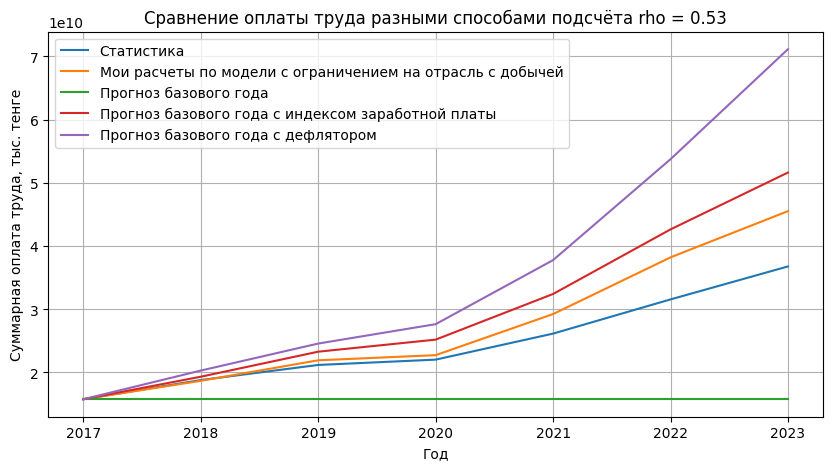

In [110]:
# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(solv.years , pay_vec_stat_np, label='Статистика')
plt.plot(solv.years, pay_vec_solv_np, label='Мои расчеты по модели с ограничением на отрасль с добычей')
plt.plot(solv.years, pay_vec_tmp, label='Прогноз базового года')
plt.plot(solv.years, pay_vec, label='Прогноз базового года с индексом заработной платы')
plt.plot(solv.years, pay_defl_vec, label='Прогноз базового года с дефлятором')
# plt.plot(diff, label='Разница', linestyle='--')
plt.xlabel('Год')
plt.ylabel('Суммарная оплата труда, тыс. тенге')
plt.title(f'Сравнение оплаты труда разными способами подсчёта rho = {rho}')
plt.legend()
plt.grid(True)
plt.savefig('graph_2_model.eps', format='eps')
plt.show()

### Тесты с какой-то суперточной библиотекой
P.S.  Результат улучшился на 1 процент, не существенно

In [54]:
# Импортируем mpmath для вычислений с произвольной точностью
import mpmath as mp
from mpmath import mpf, matrix, power, exp, log, sqrt, fabs

class Solver_exact_mp:
    def __init__(self):
            # Устанавливаем очень высокую точность - 100 знаков после запятой
            mp.dps = 100
            
            self.pre = 'data/'
            
            self.start_year = 2017
            self.end_year = 2023
            self.years = [year for year in range(self.start_year, self.end_year+1)]

            self.dict_A = dict()
            self.dict_Y = dict()
            self.dict_b = dict()
            self.dict_Z0 = dict()
            self.dict_Z3q = dict()
            
            # Сначала загружаем стандартно, конвертация будет происходить по мере необходимости
            for year in self.years:
                self.dict_A[year] = pd.read_excel(self.pre + "dict_A_aggr.xlsx", sheet_name=f"{year}", index_col=False)
                self.dict_Y[year] = pd.read_excel(self.pre + "dict_Y_aggr.xlsx", sheet_name=f"{year}", index_col=False)
                self.dict_b[year] = pd.read_excel(self.pre + "dict_B_aggr.xlsx", sheet_name=f"{year}", index_col=False)
                self.dict_Z0[year] = pd.read_excel(self.pre + "dict_Z0.xlsx", sheet_name=f"{year}", index_col=0)
                self.dict_Z3q[year] = pd.read_excel(self.pre +'3quadrant_aggr_byLabor.xlsx', sheet_name=f"{year}", index_col=False)

            self.tmp_year = self.years[0]
            self.m = self.dict_A[self.tmp_year].shape[0]
            self.n = self.dict_b[self.tmp_year].shape[0]

            self.pre3q = 'data/3q_info/'
            self.defl = pd.read_excel(self.pre3q + "series_deflator.xlsx", index_col=False)
            self.labor = pd.read_excel(self.pre3q + "series_labor.xlsx", index_col=0)
            self.index_import = pd.read_excel(self.pre3q + "series_import.ods", index_col=False, engine='odf')

            self.s = dict()
            for year in self.years:
                imp = self.index_import.loc[:, year]
                lb = self.labor.loc[:, year]
                defl = self.defl.loc[:, year]
                imp_arr = np.zeros(lb.shape) + imp.item()
                self.s[year] = pd.DataFrame({ 
                    "labor" : lb,
                    "defl" : defl.values, 
                    "import" : imp_arr, }, index=self.labor.index)
               
    def _to_mpmath_matrix(self, numpy_array):
        """
        Преобразует numpy массив в mpmath матрицу
        """
        rows, cols = numpy_array.shape if len(numpy_array.shape) > 1 else (numpy_array.shape[0], 1)
        result = mp.matrix(rows, cols)
        
        if len(numpy_array.shape) > 1:
            for i in range(rows):
                for j in range(cols):
                    result[i, j] = mpf(str(numpy_array[i, j]))
        else:
            for i in range(rows):
                result[i, 0] = mpf(str(numpy_array[i]))
                
        return result
    
    def _to_numpy(self, mpmath_matrix):
        """
        Преобразует mpmath матрицу в numpy массив
        """
        shape = mpmath_matrix.rows, mpmath_matrix.cols
        result = np.zeros(shape)
        
        for i in range(shape[0]):
            for j in range(shape[1]):
                result[i, j] = float(mpmath_matrix[i, j])
                
        return result
    
    def calculate_v(self, b, s, rho):
        """
        Вычисляет вектор V, где v_j = sum_{k=1}^n b_k^j (s^j_k)^(ρ/(1+ρ))
        
        Параметры:
        b : pandas DataFrame
        s : pandas DataFrame
        rho : float, значение ρ
        
        Возвращает:
        np.ndarray, вектор V
        """
        # Преобразуем в mpmath для высокой точности
        rho_mp = mpf(str(rho))
        power_value = rho_mp / (1 + rho_mp)
        
        # Преобразуем данные в numpy массивы для удобства работы
        s_values = s.values
        b_values = b.values
        
        # Создаем вектор результатов
        V = np.zeros(self.m)
        
        # Вычисляем сумму для каждого j
        for j in range(self.m):
            sum_j = mpf('0')
            for k in range(self.n):
                # Вычисляем (s_k^j)^(ρ/(1+ρ))
                if s_values[k, j % 3] > 0:  # Избегаем отрицательных значений
                    s_pow = power(mpf(str(s_values[k, j % 3])), power_value)
                    sum_j += mpf(str(b_values[k, j])) * s_pow
            
            V[j] = float(sum_j)
        
        return V

    def calculate_p_hat(self, A, V):
        """
        Вычисление экономического равновесия
        Вычисляет вектор p_hat = (I - A^T)^(-1) * V
        
        Параметры:
        A : pandas DataFrame, матрица A
        V : np.ndarray, вектор V
        
        Возвращает:
        np.ndarray, вектор p_hat
        """
        # Преобразуем в mpmath матрицы
        A_mp = self._to_mpmath_matrix(A.values)
        V_mp = self._to_mpmath_matrix(V.reshape(-1, 1))
        
        # Создаем единичную матрицу с высокой точностью
        I = mp.eye(A_mp.rows)
        
        # Транспонируем A
        A_T = mp.matrix(A_mp.cols, A_mp.rows)
        for i in range(A_mp.rows):
            for j in range(A_mp.cols):
                A_T[j, i] = A_mp[i, j]
        
        # Вычисляем I - A^T
        I_minus_AT = I - A_T
        
        # Решаем систему уравнений с высокой точностью
        # Используем mpmath для более точного обращения матрицы
        try:
            # Непосредственное решение системы
            p_hat_mp = mp.lu_solve(I_minus_AT, V_mp)
        except Exception as e:
            # Если стандартное решение не работает, используем SVD
            print(f"Используется альтернативный метод решения: {e}")
            I_minus_AT_inv = mp.inverse(I_minus_AT)
            p_hat_mp = I_minus_AT_inv * V_mp
        
        # Преобразуем результат обратно в numpy
        p_hat = self._to_numpy(p_hat_mp).flatten()
        
        return p_hat
    
    def identification(self, rho_values):
        res = []
        for rho in rho_values:
            error, error_rel = self.solve(rho)
            res.append((rho, error, error_rel))
        return res
    
    def solve(self, rho):
        error = mpf('0')
        error_rel = mpf('0')
        
        for i, year in enumerate(self.years):
            #V = self.calculate_v(self.dict_b[year], self.s[year], rho)
            V = self.calculate_v(self.dict_b[self.tmp_year], self.s[year], rho)
            p = self.calculate_p_hat(self.dict_A[self.tmp_year], V)
            
            Y_find = self.find_Y(p, rho, year)
            
            Z = self.calculate_Z(self.s[year], p, year, rho, Y_find)
            Z3q = self.dict_Z3q[year].values
            
            # Вывод для отладки
            print(f" Z= {Z}")
            print(f"Z3q = {Z3q}")
            print(f" diff = {Z - Z3q}")
            
            # Вычисляем ошибку с высокой точностью
            for k in range(Z.shape[0]):
                diff_row = Z[k, :] - Z3q[k, :]
                # Используем mpmath для вычисления нормы
                norm_diff = mpf('0')
                for val in diff_row:
                    norm_diff += mpf(str(val)) ** 2
                norm_diff = sqrt(norm_diff)
                error += norm_diff
                
                # Вычисляем относительную ошибку
                rel_diff_row = np.zeros_like(diff_row)
                for j in range(len(diff_row)):
                    if abs(Z3q[k, j]) > 1e-15:  # Защита от деления на очень маленькие числа
                        rel_diff_row[j] = diff_row[j] / Z3q[k, j]
                
                # Норма относительной ошибки
                rel_norm = mpf('0')
                for val in rel_diff_row:
                    rel_norm += mpf(str(val)) ** 2
                rel_norm = sqrt(rel_norm)
                error_rel += rel_norm
        
        return float(error), float(error_rel)

    def find_Y(self, p, rho, year):
        lambda_ij = self.calculate_lambda_scalar_rho(p, self.dict_A[self.tmp_year], rho)
        
        # Преобразуем в mpmath матрицы
        lambda_mp = self._to_mpmath_matrix(lambda_ij)
        Z0_mp = self._to_mpmath_matrix(self.dict_Z0[year].values)
        
        # Создаем единичную матрицу с высокой точностью
        I = mp.eye(lambda_mp.rows)
        
        # Вычисляем I - lambda
        IminusLmbd = I - lambda_mp
        
        # Решаем систему уравнений с высокой точностью
        try:
            # Вычисляем обратную матрицу
            IminusLmbd_inv = mp.inverse(IminusLmbd)
            Y_mp = IminusLmbd_inv * Z0_mp
        except Exception as e:
            # Если обращение не работает, используем решение системы
            print(f"Используется альтернативный метод для Y: {e}")
            Y_mp = mp.lu_solve(IminusLmbd, Z0_mp)
        
        # Преобразуем результат обратно в numpy
        Y = self._to_numpy(Y_mp)
        
        return Y

    def calculate_lambda_scalar_rho(self, p, a, rho):
        """
        Вычисляет матрицу Lambda по заданным векторам p, матрице a и скалярному rho.

        Аргумент
            p (np.ndarray): Вектор p (m x 1).
            a (np.ndarray): Матрица a (m x m).
            rho (float): Скалярное значение rho.

        Возвращает:
            np.ndarray: Матрица Lambda (m x m).
        """
        # Преобразуем в mpmath для высокой точности
        rho_mp = mpf(str(rho))
        power_value = rho_mp / (1 + rho_mp)
        
        # Получаем размерность матрицы
        n = len(p)
        
        # Создаем матрицу для результата
        lambda_ij = np.zeros((n, n))
        
        # Вычисляем для каждой пары i, j
        for i in range(n):
            for j in range(n):
                # Вычисляем отношение p_i/p_j с защитой от деления на ноль
                if abs(p[j]) > 1e-15:
                    ratio = mpf(str(p[i])) / mpf(str(p[j]))
                    # Вычисляем (p_i/p_j)^(ρ/(1+ρ))
                    if ratio > 0:
                        ratio_pow = power(ratio, power_value)
                        # Умножаем на a_ij
                        lambda_ij[i, j] = float(ratio_pow * mpf(str(a.values[i, j])))
        
        return lambda_ij

    def calculate_Z(self, s, p, year, rho, Y):
        """
        Вычисляет Z_{m+k}^j по формуле Z_{m+k}^j = (s_k^j/p_j)^(ρ/(1+ρ)) * b_{kj} * Y_j
        
        Параметры:
        s : pandas DataFrame
        p : np.ndarray, вектор p_j (массив длины m)
        b : pandas DataFrame
        Y : np.ndarray, матрица Y размера m x ?
        rho : float, значение ρ
        
        Возвращает:
        np.ndarray, матрица Z размера n x m, где Z[k-1, j-1] = Z_{m+k}^j
        """
        # Преобразуем в mpmath для высокой точности
        rho_mp = mpf(str(rho))
        power_value = rho_mp / (1 + rho_mp)
        
        # Создаем массив для результата
        Z = np.zeros((self.n, self.m))
        
        # Получаем данные
        s_values = s.values
        b_values = self.dict_b[self.tmp_year].values
        
        # Вычисляем для каждой пары k, j
        for k in range(self.n):
            for j in range(self.m):
                # Вычисляем (s_k^j/p_j)^(ρ/(1+ρ))
                if abs(p[j]) > 1e-15 and s_values[k, j % 3] > 0:
                    ratio = mpf(str(s_values[k, j % 3])) / mpf(str(p[j]))
                    ratio_pow = power(ratio, power_value)
                    
                    # Получаем Y_j (в зависимости от формы Y, может потребоваться корректировка)
                    Y_j = mpf(str(Y.flatten()[j] if Y.size == self.m else Y[j, 0]))
                    
                    # Вычисляем Z_{m+k}^j
                    Z[k, j] = float(ratio_pow * mpf(str(b_values[k, j])) * Y_j)
        
        return Z

In [55]:
solver_exact_mp =Solver_exact_mp()

In [56]:
solver_exact_mp.solve(0.005)

 Z= [[6.14905163e+08 1.79442378e+09 1.72903917e+09 4.70576260e+08
  1.10816946e+08 9.14646257e+08 3.64889254e+09 1.09443449e+09
  1.65351057e+08 3.83725010e+08 6.85428843e+08 3.18883603e+08
  7.96733736e+08 4.34222608e+08 6.86728719e+08 9.75678751e+08
  2.09823822e+08 1.34908874e+08 5.71299330e+08]
 [2.85887421e+09 8.10405268e+09 1.54482484e+10 9.21430759e+08
  1.85705499e+08 2.65639290e+09 1.02913318e+10 4.35761024e+09
  4.14201239e+08 1.01959297e+09 2.07295702e+09 4.87541273e+09
  2.63725798e+09 1.06513260e+09 9.01801686e+08 1.38099928e+09
  3.21433228e+08 2.45520849e+08 1.36042052e+09]
 [4.07500381e+08 4.41401409e+08 1.01157122e+10 6.63429066e+07
  1.87301127e+07 6.00998481e+08 4.99889246e+06 1.14974597e+08
  0.00000000e+00 1.57979207e+08 6.44730554e+07 1.16018539e+07
  1.15416117e+09 1.58603650e+08 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.55717090e+07 6.82327290e+05]]
Z3q = [[  615972802  1797256676  1732919345   471503266   111056904   916546024
   3655337582  1096204300  

(30403149686.970222, 87.6791807601389)